# Telecom Customer Churn Prediction

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from tabulate import tabulate
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\LKOUL\Desktop\JUPI\ClassificationOnCRMDataset (1)\Telco_Customer_Churn.csv")

### Exploratory Data Analysis - EDA 

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

Το dataset μας περιέχει 7043 γραμμές (rows) και 21 μεταβλητές (Variables).
Δημιουργούμε τα metadata.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning ##

#### Checking Missing Values

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Παρατηρούμε πως δεν λείπουν τιμές από το Dataframe. 

#### Checking and Updating Data Type ####

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Οι τύποι δεδομένων (Datatypes) από όλες τις στήλες (columns) είναι σωστοί.

#### Frequency Table of Each Variable

Πίνακας συχνοτήτων (Frequency Table) που χρησιμοποιείται για τον έλεγχο των τιμών κάθε στήλης

In [8]:
df.apply(lambda x: print(x.value_counts(),"\n"))

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 

Male      3555
Female    3488
Name: gender, dtype: int64 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

No     3641
Yes    3402
Name: Partner, dtype: int64 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

No         

customerID          None
gender              None
SeniorCitizen       None
Partner             None
Dependents          None
tenure              None
PhoneService        None
MultipleLines       None
InternetService     None
OnlineSecurity      None
OnlineBackup        None
DeviceProtection    None
TechSupport         None
StreamingTV         None
StreamingMovies     None
Contract            None
PaperlessBilling    None
PaymentMethod       None
MonthlyCharges      None
TotalCharges        None
Churn               None
dtype: object

## Descriptive Analysis ##

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Ο παραπάνω πίνακας δείχνει τα συνοπτικά στατιστικά στοιχεία κάθε στήλης, όπως οι ελάχιστες και μέγιστες τιμές, η τυπική απόκλιση, το συνολικό πλήθος και τις 1ες, 2ες και 3ες ποσοστιαίες ποσότητες.

In [10]:
df.describe(include="O")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Δεδομένου ότι το customerID είναι απλώς id για τους πελάτες, για το λόγο αυτό δεν θα συμπεριληφθεί στην ανάλυση.

# Visualization #

### Univariane Analysis ###

Διαχωρισμός κατηγορικών κι αριθμητικών μεταβλητών.

In [11]:
sns.set(rc={'figure.figsize':(15.7,8.27)})

In [12]:
categorical = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
numerical = ['tenure','MonthlyCharges','TotalCharges']

**Categorical Plot**

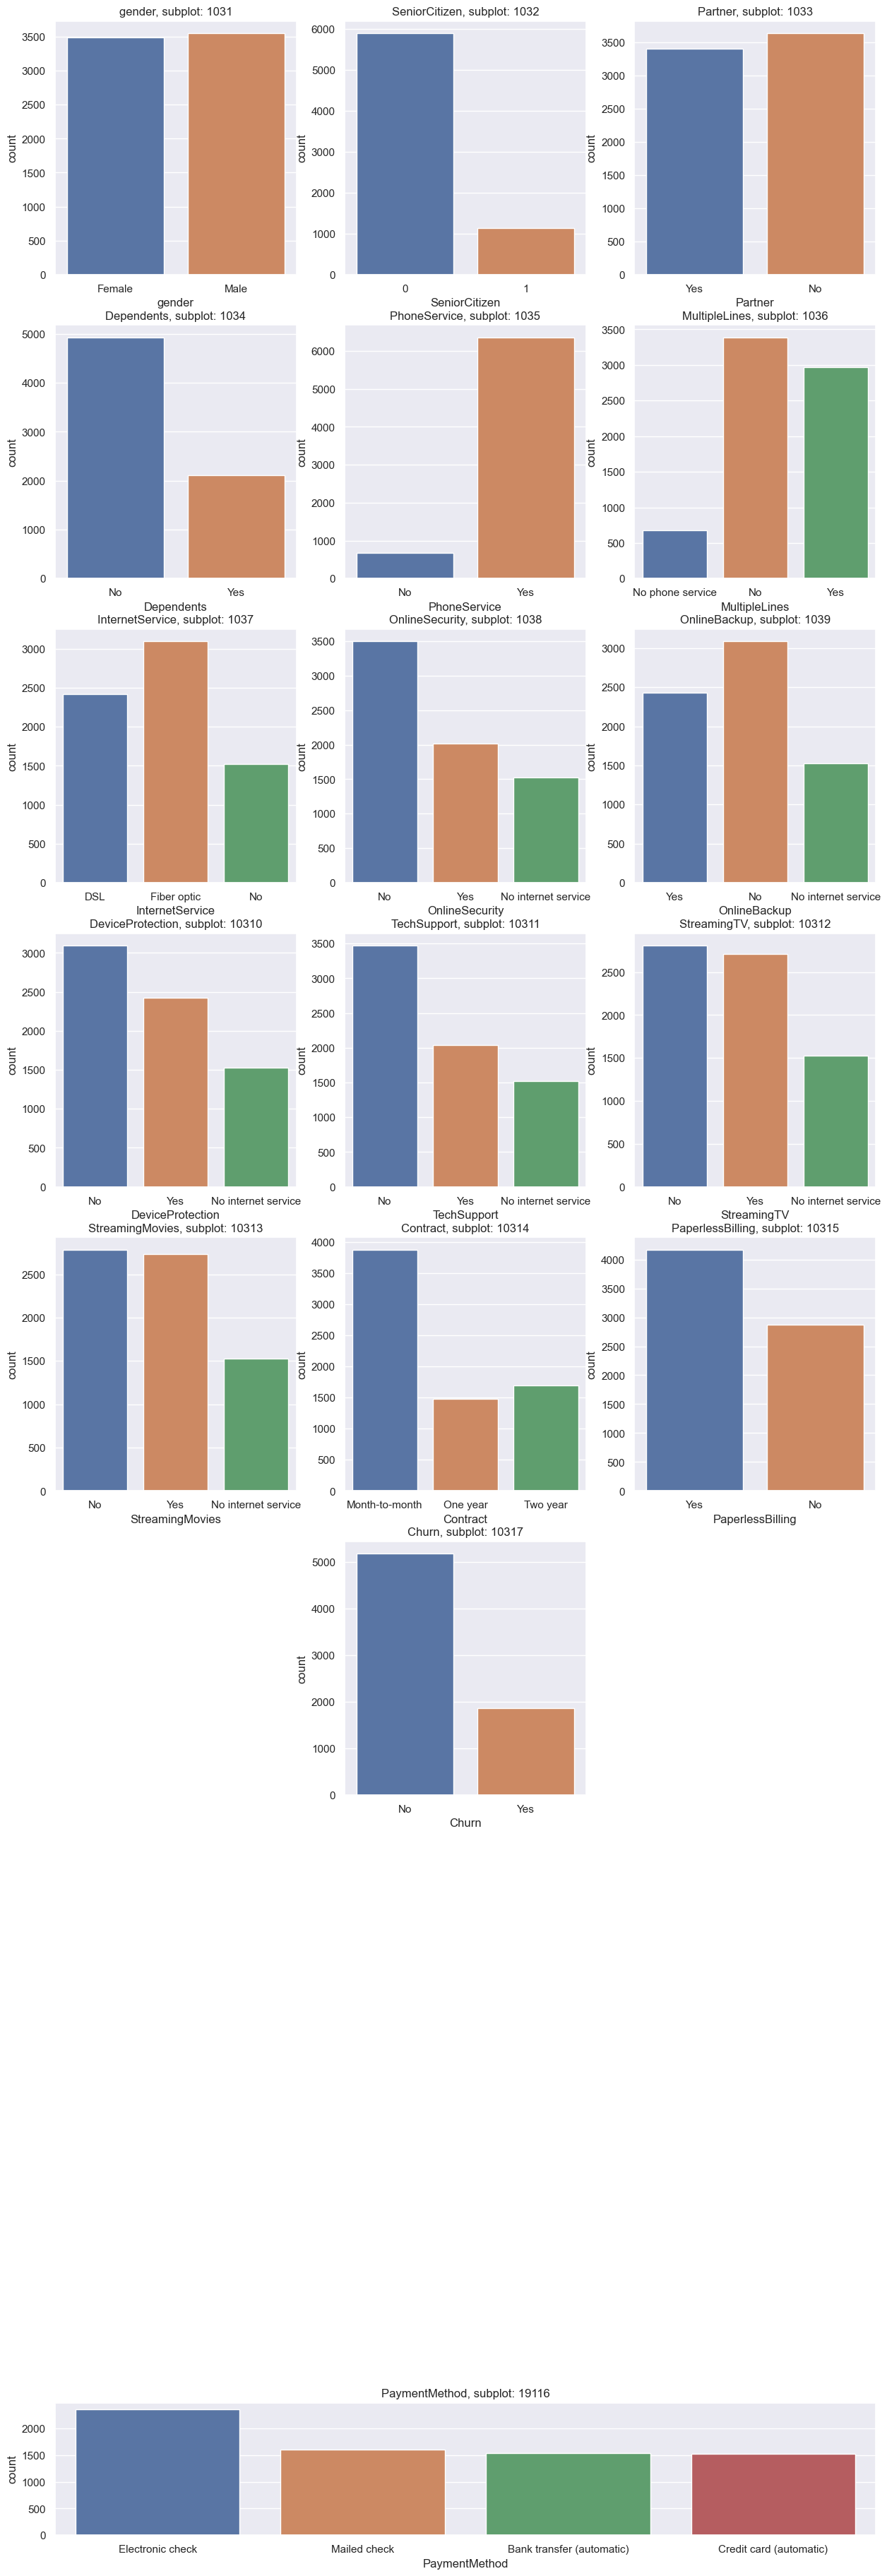

In [13]:
a=10
b=3
c=1
fig = plt.figure(figsize=(15,55))
for i in categorical:
    if i == "PaymentMethod":
        plt.subplot(19, 1, c)
        plt.title('{}, subplot: {}{}{}'.format(i, 19, 1, c))
        plt.xlabel(i)
        sns.countplot(data = df, x=i)
        c = c + 1
    else:
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.countplot(data = df, x=i)
        c = c + 1

Από τα παραπάνω barplots όλων των κατηγορικών μεταβλητών (categorical variables) μπορούμε να δούμε την κατανομή των τιμών σε όλες τις κατηγορικές στήλες (categorical columns). Παρατηρούμε οτι:
- Οι άντρες κι οι γυναίκες κυμαίνονται στις ίδιες τιμές στο dataset.
- Oι περισσότεροι πελάτες δεν είναι ηλικιωμένοι.
- Οι πελάτες που έχουν κάποιο/α σύντροφο (Partner) είναι ελαφρώς λιγότεροι απο εκείνους που δεν έχουν.
- Η πλειοψηφία των πελατών επιλέγουν υπηρεσία τηλεφώνου (PhoneService).
- Η πλειοψηφία των πελατών έχουν υπηρεσία internet με μεγαλύτερο ποσοστό χρήσης οπτικών ινών (InternetService).
- Η πλειοψηφία των πελατών δεν έχουν online παροχές ασφάλειας (OnlineSecurity).
- Η πλειοψηφία των πελατών δεν έχουν online αντίγραφα ασφαλείας (OnlineBackup).
- Με μικρή διαφορά, παρατηρούμε πως οι πελάτες δεν έχουν πολλαπλές γραμμές τηλεφώνου (MultipleLines).
- Η πλειοψηφία των πελατών δεν έχουν τεχνική υποστήριξη (TechSupport).
- Ο αριθμός των πελατών που δεν έχουν υπηρεσίες ροής τηλεόρασης και ταινιών (StreamingTV, StreamingMovies) είναι ελαφρώς υψηλότερος.
- Με μεγάλη διαφορά παρατηρούμε πως οι πελάτες επιλέγουν συμβόλαιο (Contract) ανά μήνα, ενώ η διαφορά μεταξύ ενοός και δύο ετών συμβολαίου είναι αμελητέα.
- Οι περισσότεροι πελάτες λαμβάνουν τους λογαριασμούς τους ηλεκτρονικά (PaperlessBilling).
- Οι μεθόδοι πληρωμής κυμαίνονται σε ίδιες τιμές με το e-check να υπερτερεί (PaymentMethod).
- Τέλος, περίπου το 20% των πελατών είναι πιθανό να αποχωρήσει (Churn).

Οπτικοποίηση σε Pie Chart και ποσοστιαία παρουσίαση των κατανομών αυτών.

#### Pie Chart

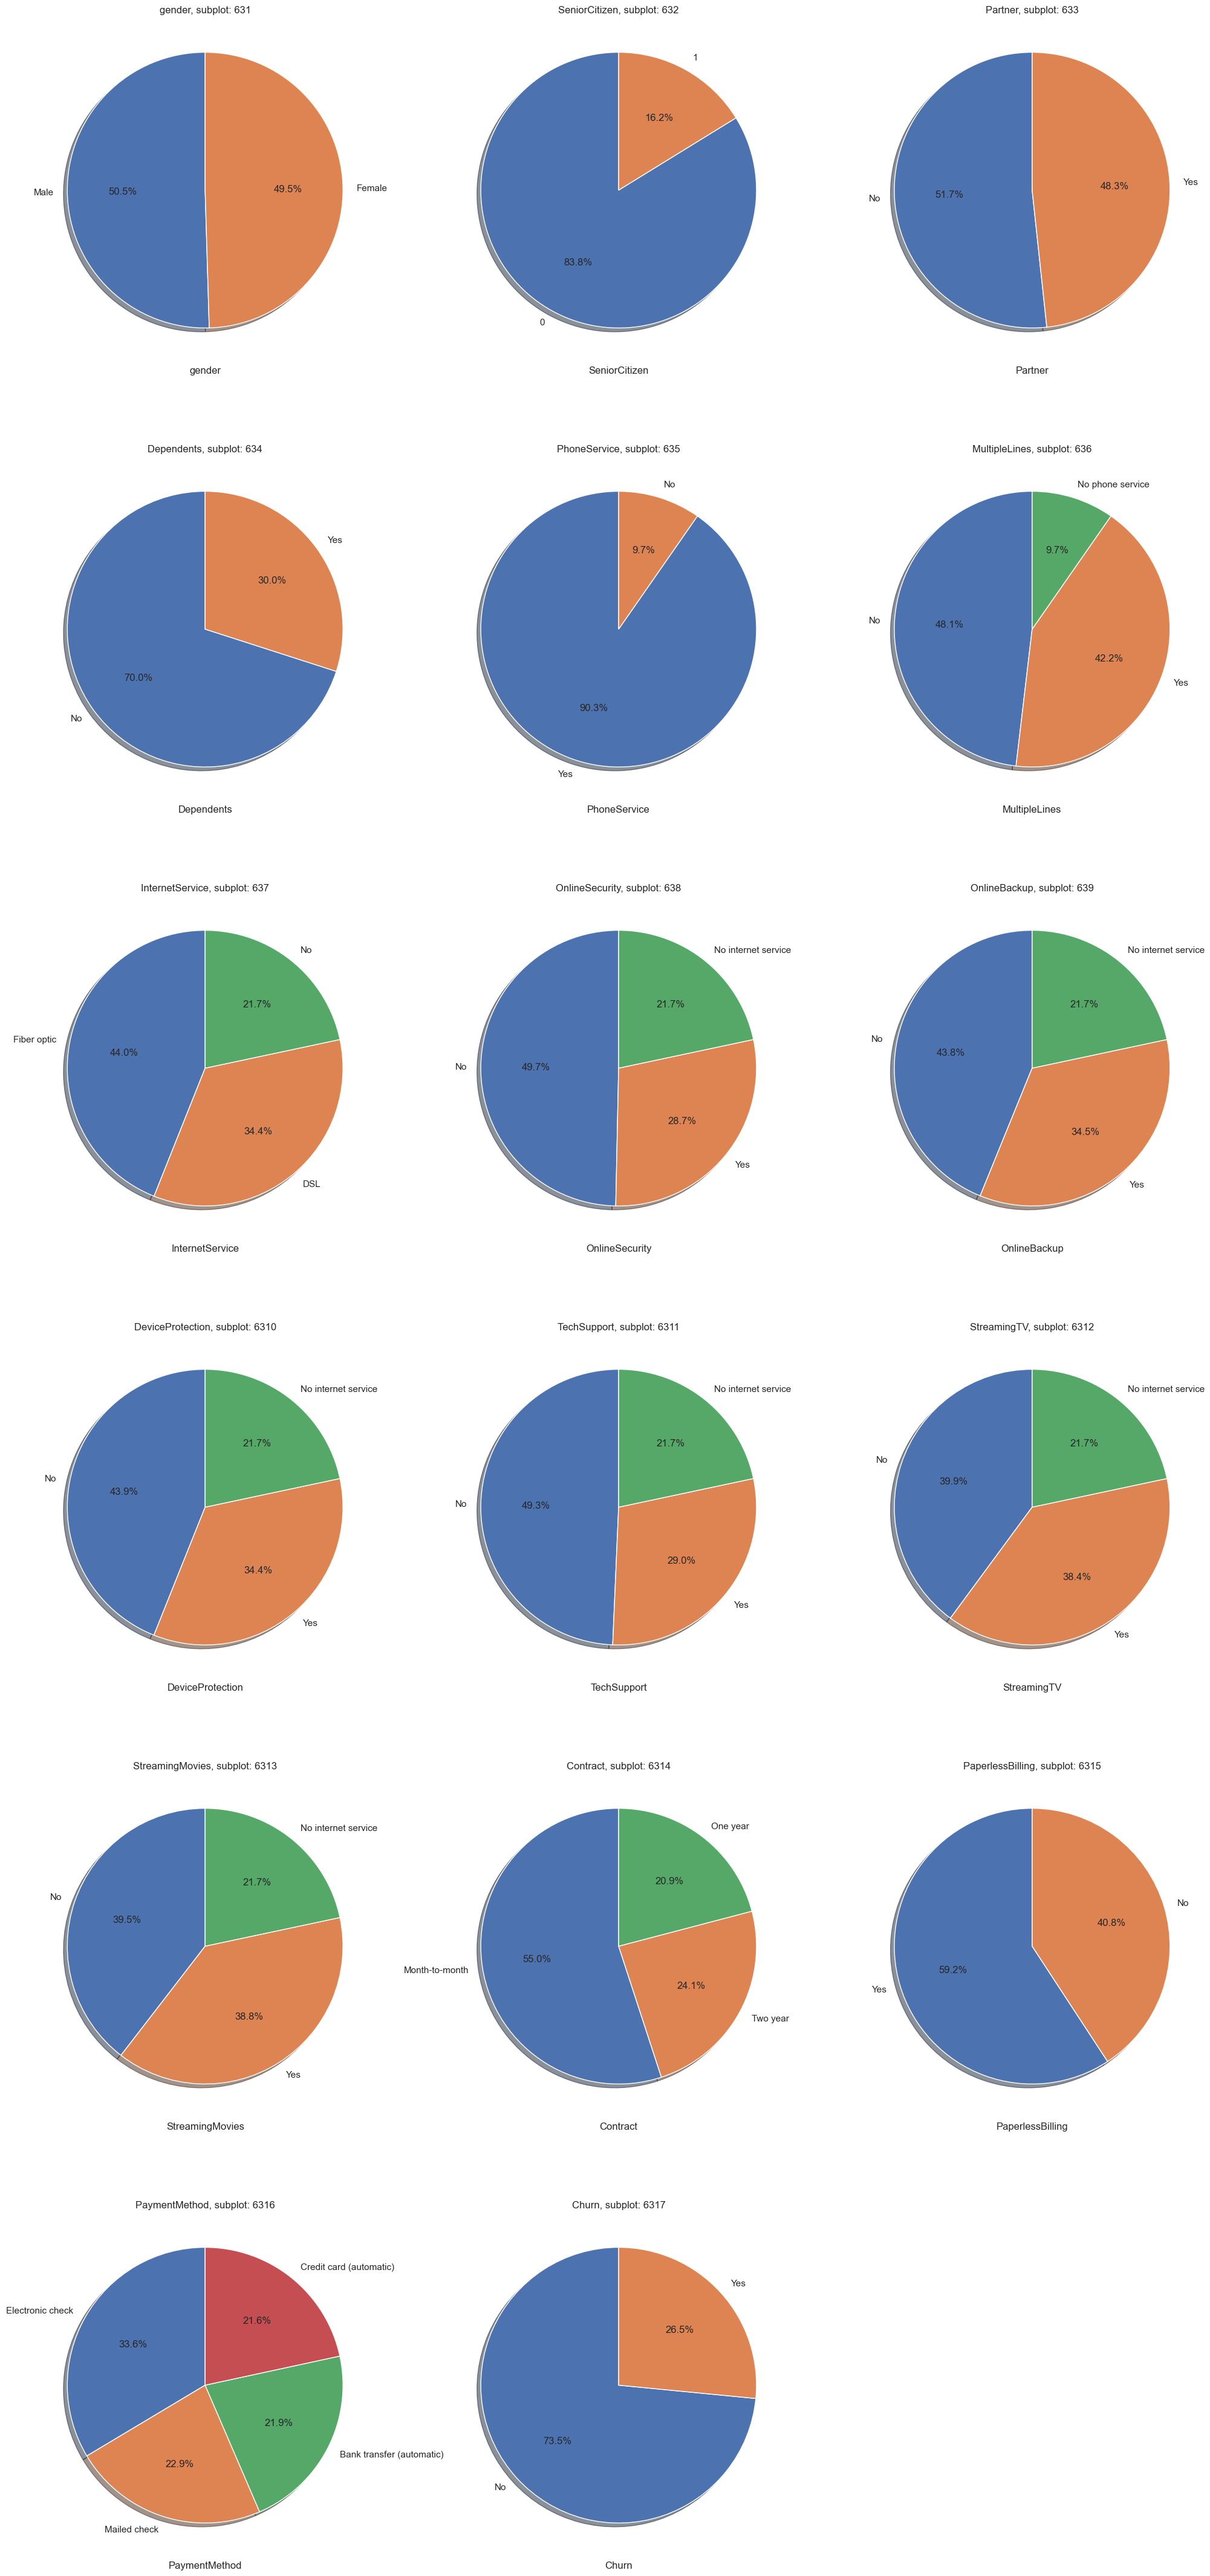

In [14]:
a=6
b=3
c=1
fig = plt.figure(figsize=(25,55))
for i in df[categorical]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.pie(df[i].value_counts(),autopct='%1.1f%%',startangle=90,shadow=True,labels=df[i].value_counts().keys().values)
    c = c + 1

### Bivariate Visualization 

Οπτικοποίηση κάθε στήλης ως προς την ποιότητα

In [16]:
col = ['SeniorCitizen','Partner','Dependents','gender','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','tenure','MonthlyCharges','TotalCharges']

In [17]:
df['Churn'] = df['Churn'].replace(['No','Yes'],[0,1])

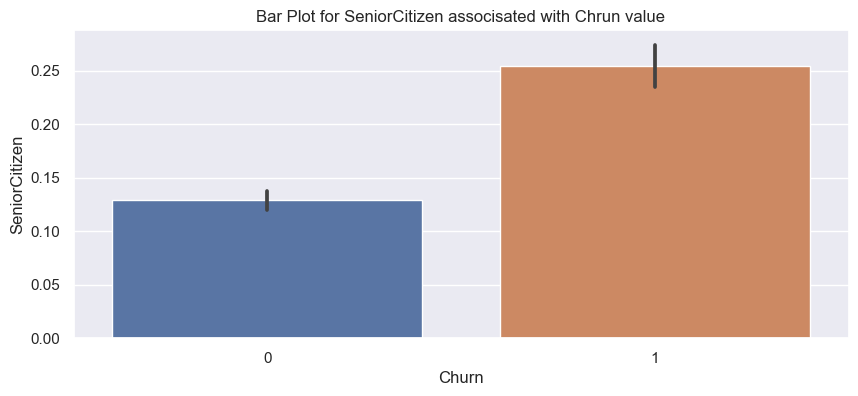

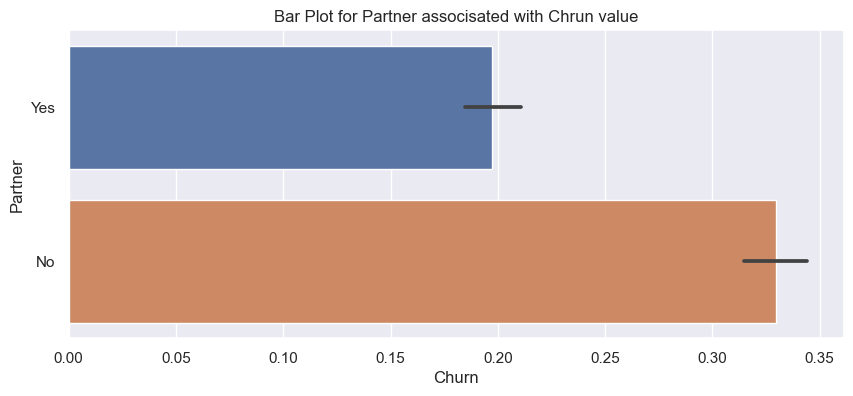

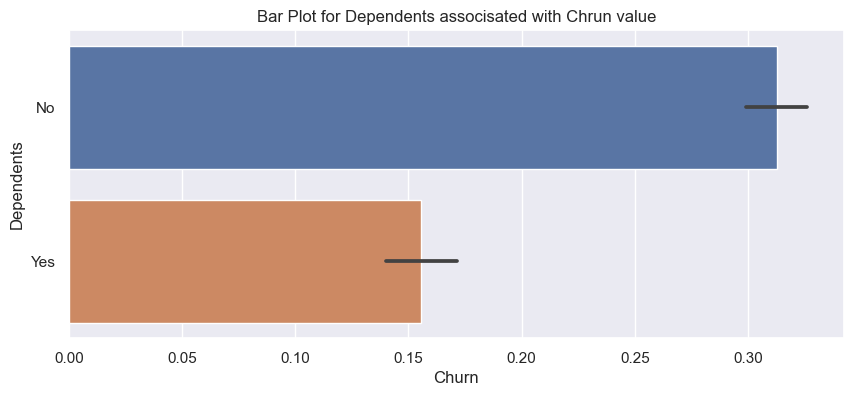

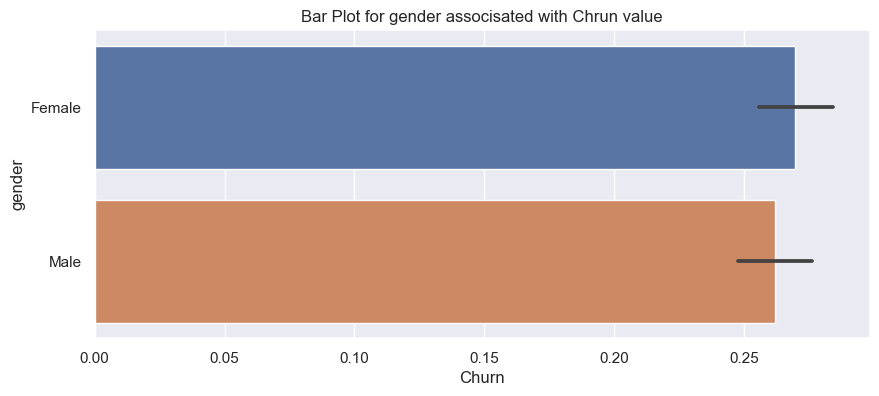

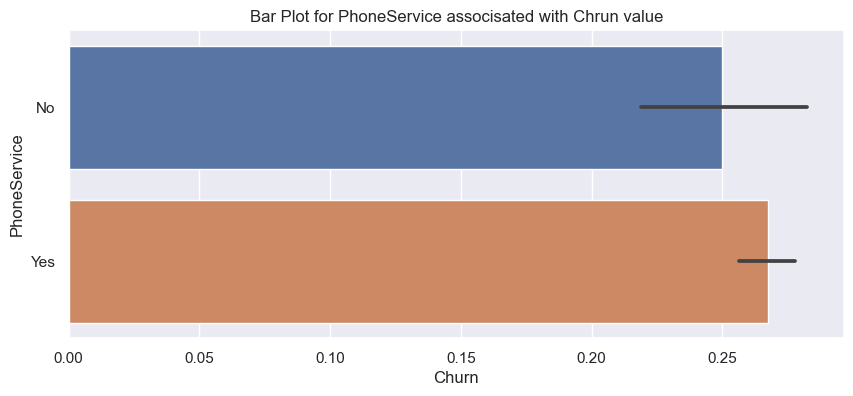

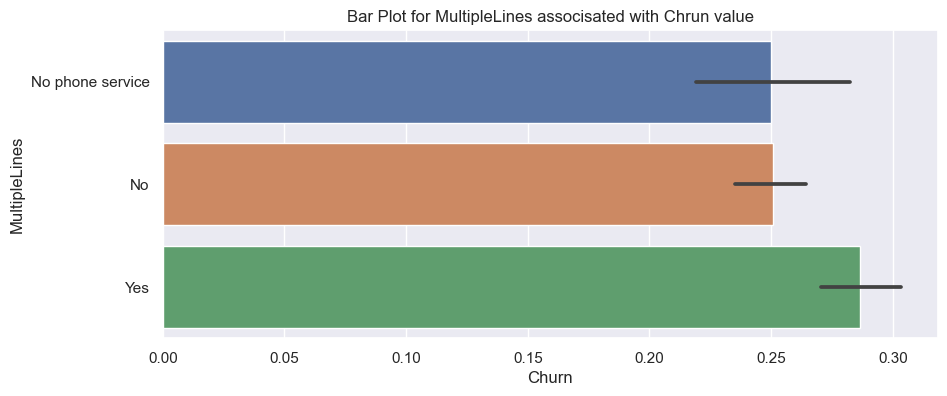

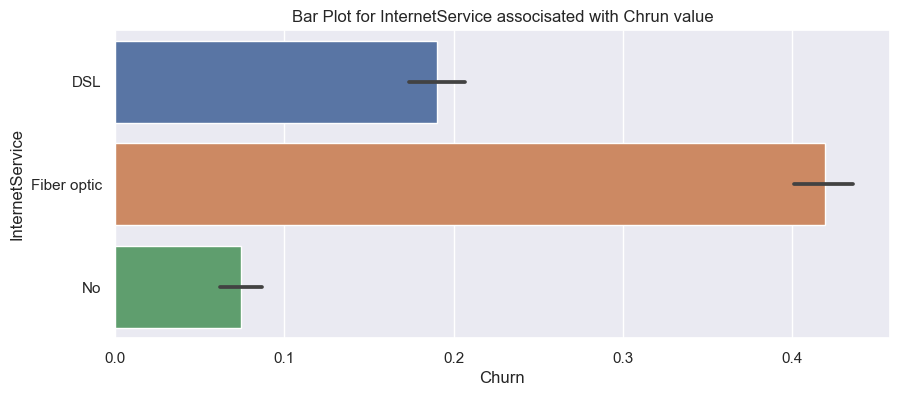

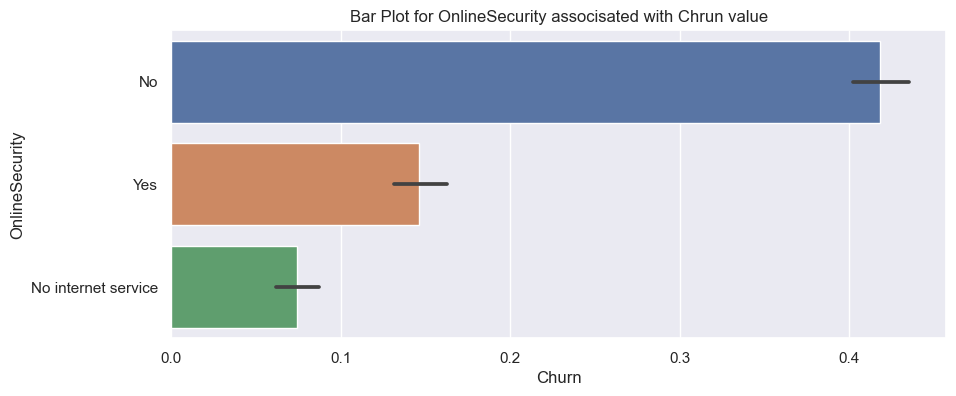

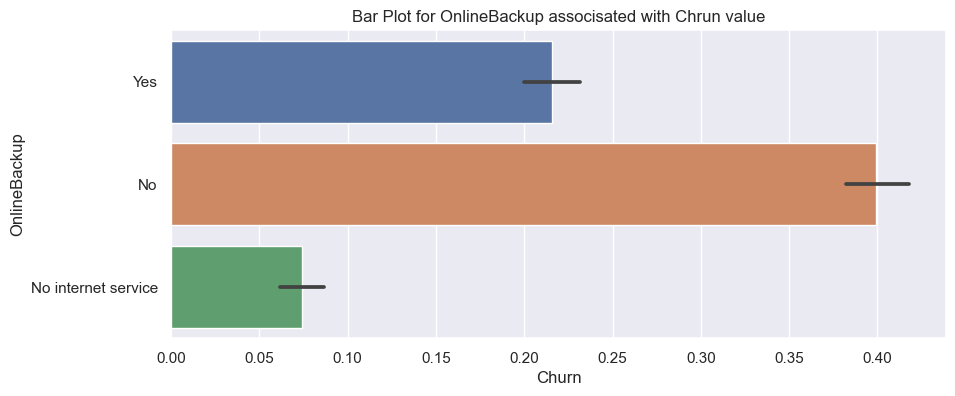

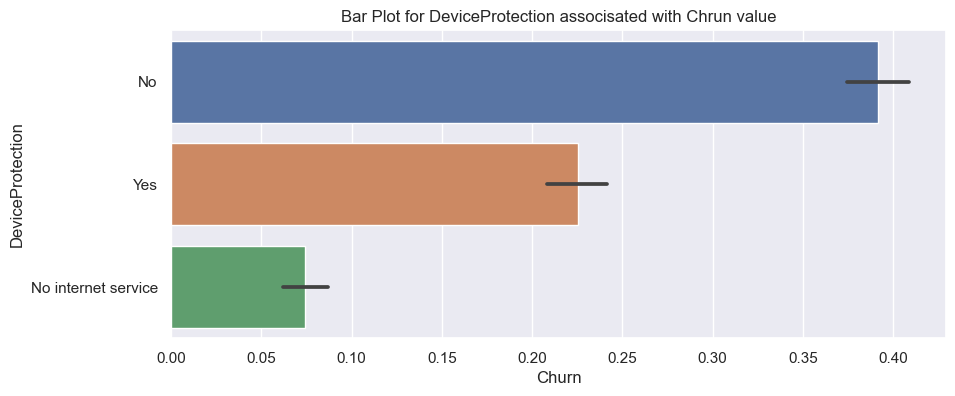

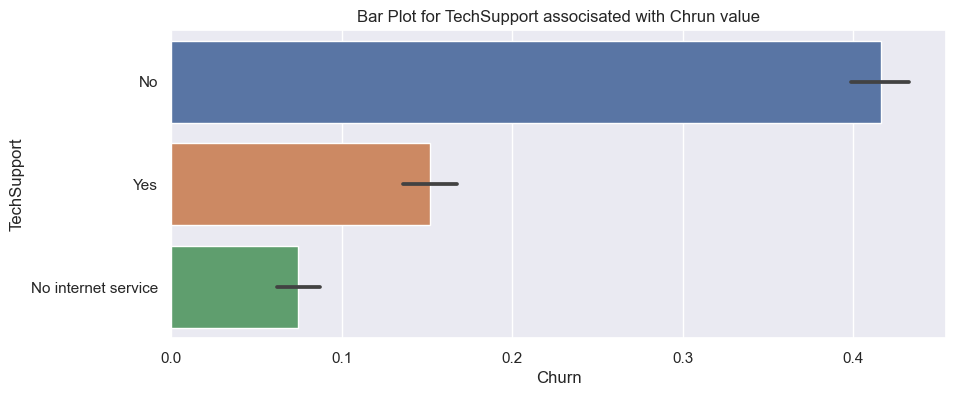

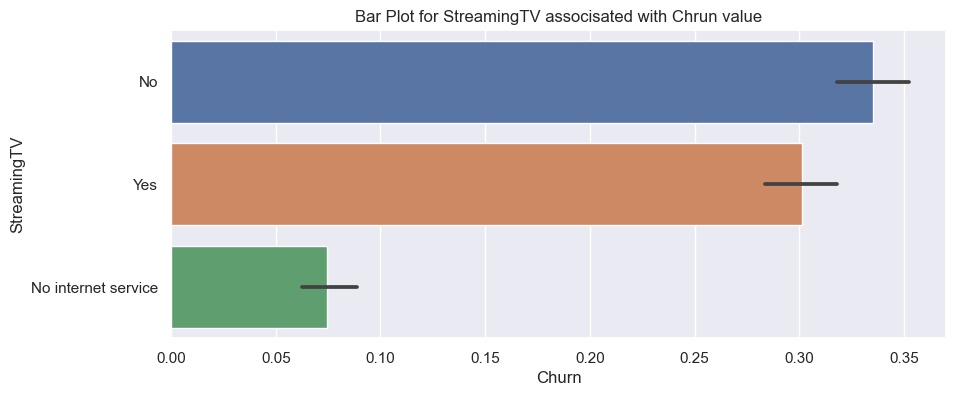

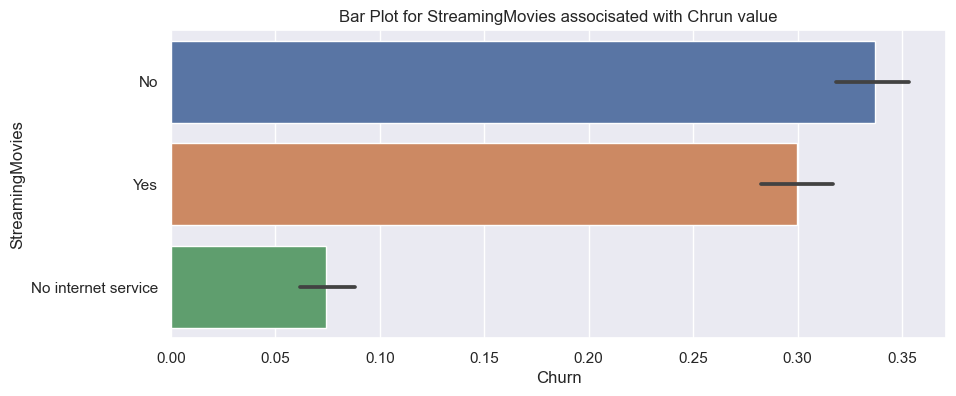

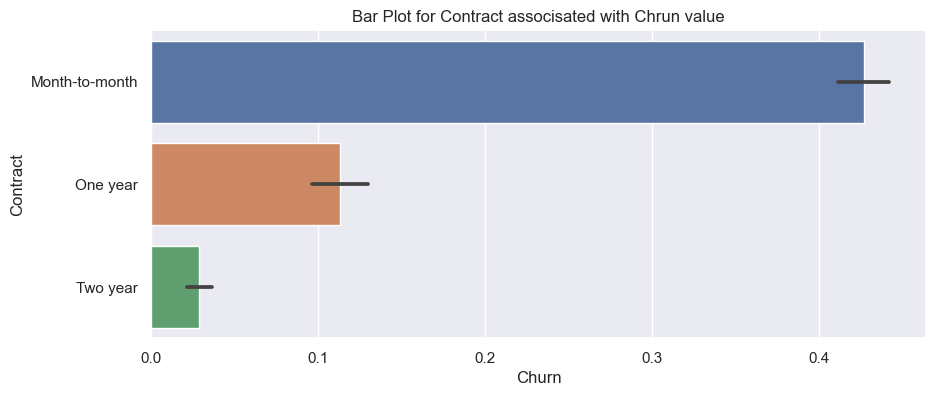

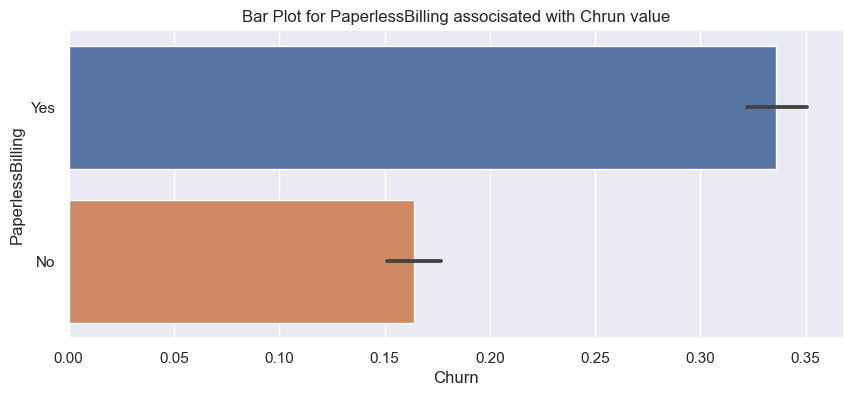

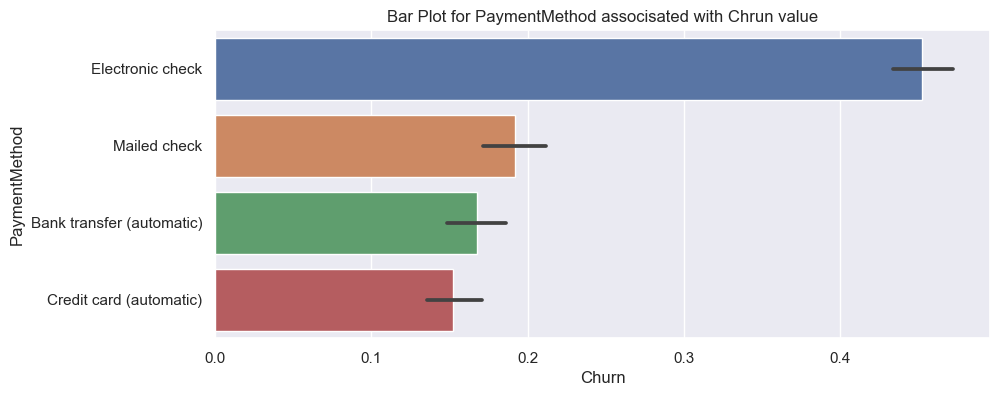

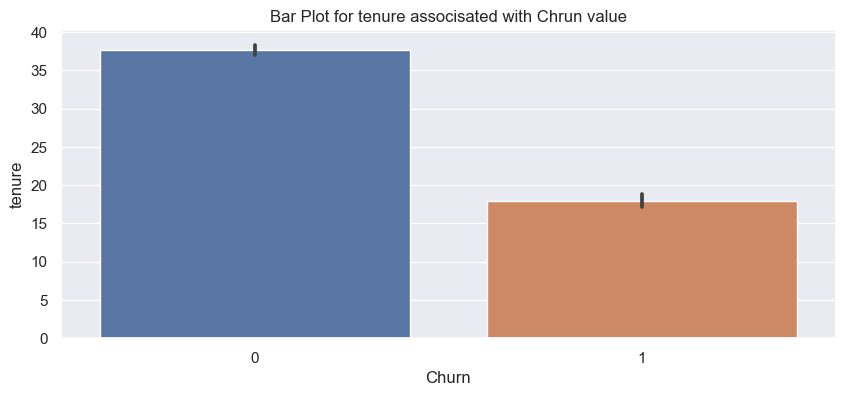

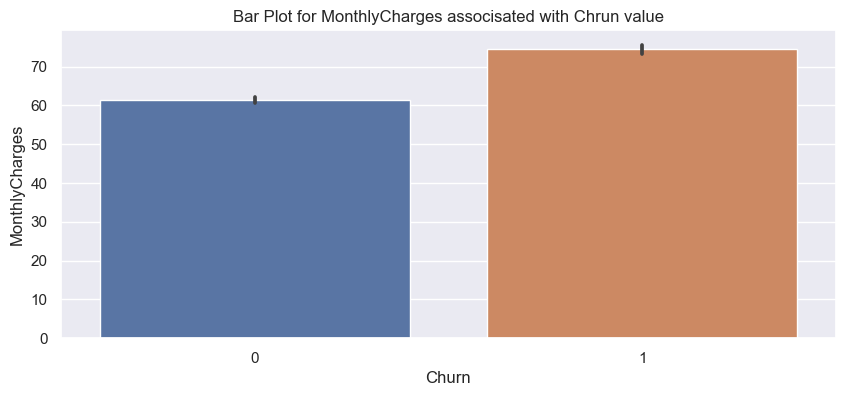

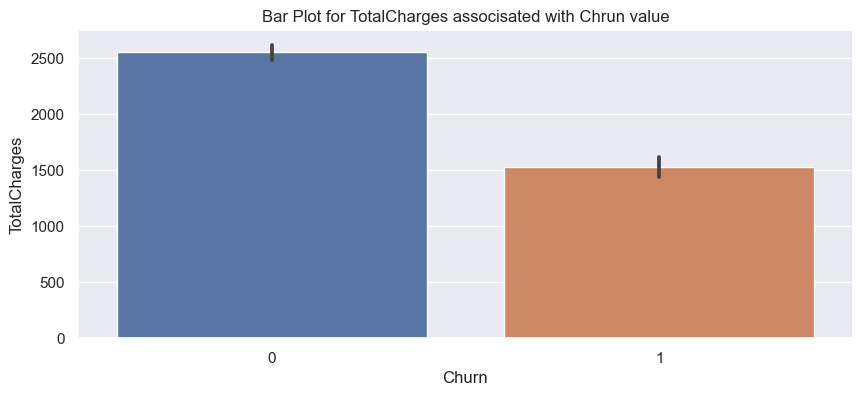

In [18]:
for i in col:
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.barplot(data=df, y=i, x='Churn', ax=ax)
    ax.set_ylabel(i)
    ax.set_xlabel("Churn")
    ax.set_title(f'Bar Plot for {i} associsated with Chrun value')
    plt.show()

Οι παραπάνω γραφικές παραστάσεις πσρουσιάζουν την ποικιλομορφία των τιμών κάθε μεταβλητής σε σχέση με τη μεταβλητή-στόχο (Churn):
- Οι πελάτες οι οποίοι είναι μεγαλύτερης ηλικίας (SeniorCitizen) είναι πιο πιθανό να αποχωρήσουν.
- Οι πελάτες που έχουν κάποιο/α σύντροφο (Partner) είναι πιο πιθανό να παραμείνουν στην εταιρία.
- Tα εξαρτώμενα άτομα (Dependents) ενός πελάτη επιδρούν θετικά στην παραμονή τους.
- Οι άντρες κι οι γυναίκες (gender) έχουν παρόμοιες πιθανότητες αποχώρησης.
- Oι πελάτες οι οποίοι έχουν υπηρεσία τηλεφώνου (PhoneService) είναι ελαφρώς πιθανότερο να αποχωρήσουν.
- Οι πελάτες που έχουν πολλαπλές γραμμές (MultipleLines) είναι πιο πιθανό να αποχωρήσουν σε σχέση με εκείνους που είτε δεν έχουν πολλαπλές γραμμές, είτε υπηρεσία τηλεφώνου.
- Οι πελάτες με υπηρεσία internet (InternetService) oπτικών ινών έχουν πάρα πολύ υψηλή πιθανότητα να αποχωρήσουν σε σχέση με τους πελάτες δεν έχουν κάποια σύνδεση internet ή έχουν σύνδεση DSL.
- Η έλλειψη ασφάλειας στο διαδίκτυο (OnlineSecurity), δημιουργίας διαδικτυακών αντιγράφων ασφαλείας (OnlineBackup), η προστασίας συσκευής (DeviceProtection) καθώς επίσης και η τεχνικής υποστήριξης (TechSupport) αποτελούν πολύ σημαντικούς παράγοντες αποχώρησης των πελατών.
- Οι υπηρεσίες ροής τηλεόρασης (StreamingTV) και ταινιών (StreamingMovies) επηρεάζουν κατά μικρό ποσοστό την δυσαρέσκεια των πελατών.
- Το χρονικό διάστημα σε μήνες (tenure), που ο πελάτης είναι στην εταιρία λειτουργεί ως παράγοντας αποχώρησης. Παρατηρούμε πως οι πελάτες οι οποίοι είναι παραπάνω χρόνο στην εταιρία, ειναι πιο πιθανό να παραμείνουν.
- Οι πελάτες με όρους σύμβασης (Contract) μήνα ανα μήνα έχουν πάρα πολύ υψηλή πιθανότητα αποχώρησης. Εκείνοι με ένα έτος λιγότερη, ενώ οι πελάτες με συμβόλαιο δυο ετών έχουν ελάχιστες πιθανότητες να αποχωρήσουν.
- Το μέγεθος του συνολικού ποσού (ΤotalCharges) έχει σημαντικό ρόλο. Όσο χαμηλότερη είναι το ποσό, τόσο μικρότερη η δυσαρέσκεια των πελατών. 
- Τέλος, βλέπουμε πως οι πελάτες οι οποίοι λαμβάνουν σε ηλεκτρονική μορφή το τιμολόγιό τους (PaperlessBilling) και εκτελούν πληρώνουν με ηλεκτρονικές μεθόδους πληρωμών (PaymentMethod), είναι πιο πιθανό να αποχωρήσουν.

### Feature Encoding
Κωδικοποίηση των κατηγορικών μεταβλητών:

In [19]:
df['gender'] = df['gender'].replace(['Male','Female'],[0,1])

In [20]:
df['PaymentMethod'] = df['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3])

In [21]:
df['Partner'] = df['Partner'].replace(['No','Yes'],[0,1])

In [22]:
df['Dependents'] = df['Dependents'].replace(['No','Yes'],[0,1])

In [23]:
df['PhoneService'] = df['PhoneService'].replace(['No','Yes'],[0,1])

In [24]:
df['StreamingMovies'] = df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,2])

In [25]:
df['MultipleLines'] = df['MultipleLines'].replace(['No','Yes','No phone service'],[0,1,2])

In [26]:
df['InternetService'] = df['InternetService'].replace(['DSL','Fiber optic','No'],[0,1,2])

In [27]:
df['Contract'] = df['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2])

In [28]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,2])

In [29]:
df['OnlineBackup'] = df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,2])

In [30]:
df['DeviceProtection'] = df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,2])

In [31]:
df['TechSupport'] = df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,2])

In [32]:
df['StreamingTV'] = df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,2])

In [33]:
df['PaperlessBilling'] = df['PaperlessBilling'].replace(['No','Yes'],[0,1])

**Correlation Plot**

Έλεγχος των τιμών συσχέτισης κάθε μεταβλητής

<Axes: >

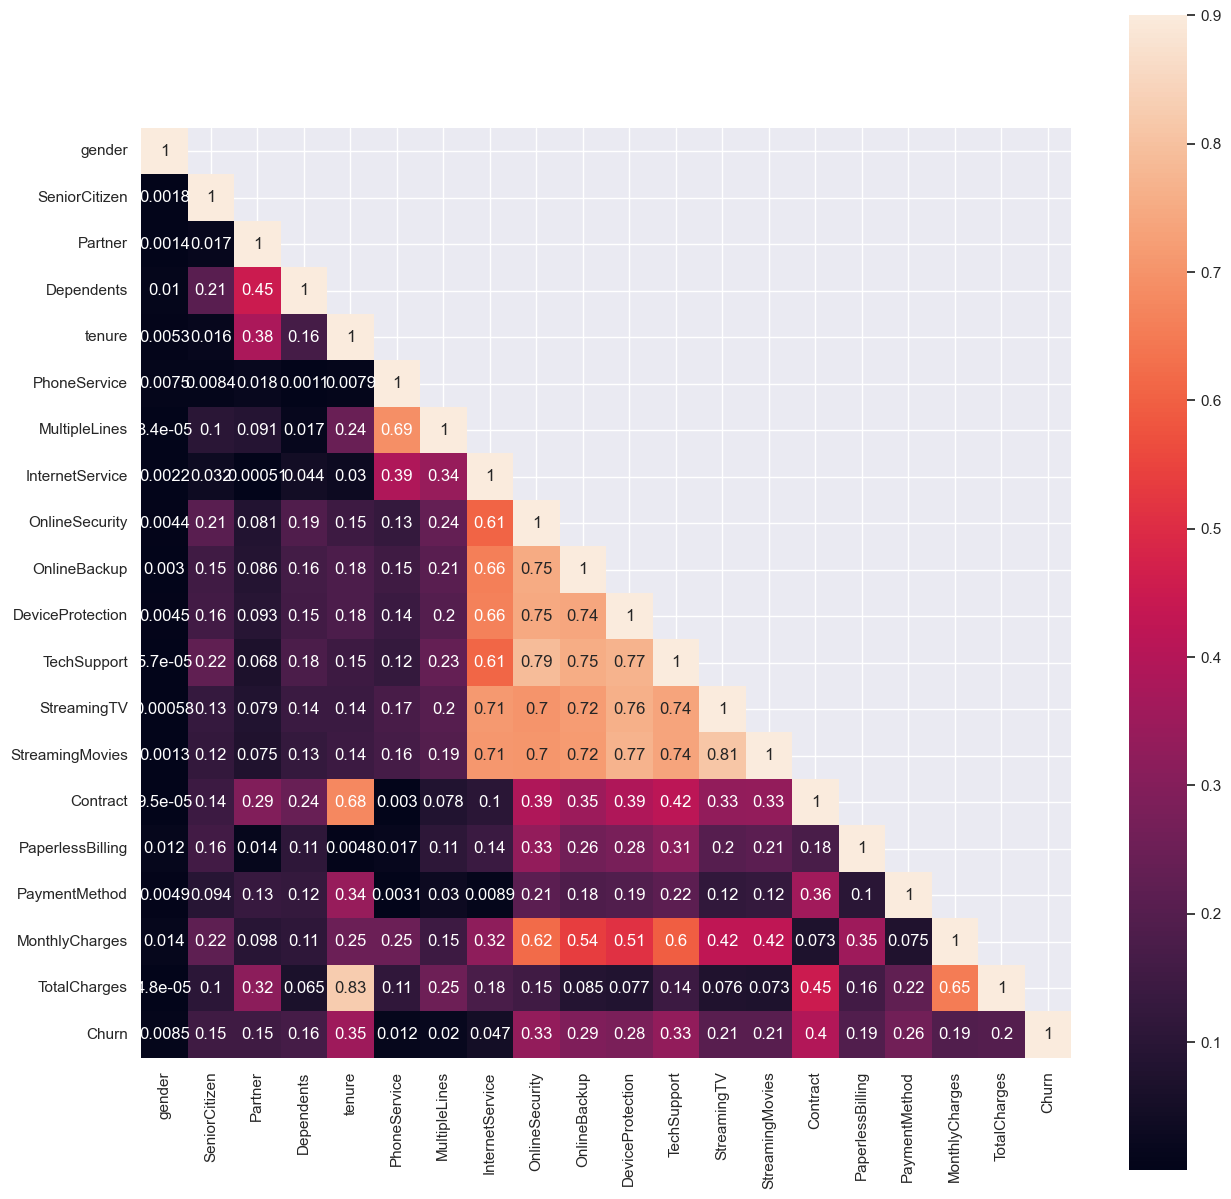

In [34]:
corr = df.corr(method = 'pearson').abs()

#convert correlation to numpy array
mask = np.array(corr)

#mask repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

Το παραπάνω διάγραμμα δείχνει τη συσχέτιση μεταξύ των μεταβλητών. Εδώ μπορούμε να δούμε ότι η αποχώρηση των πελατών σχετίζεται με την ηλικία, το φύλο, εάν είναι ενεργό μέλος και τo υπόλοιπό του. 
Σε αντίθεση με τα παραπάνω χαρακτηριστικά, μικρότερη συσχέτιση έχουν η γεωγραφία και ο αριθμός των προϊόντων.

### Feature Selection

Παρόλο που η γραφική παράσταση συσχέτισης (correlation plot) προσδιορίζει ορισμένες μεταβλητές οι οποίες συσχετίζονται με την μεταβλητή εξόδου, για να αποφύγουμε το μοντέλο να κάνει overfit στα δεδομένα θα χρησιμοποιήσουμε όλες τις μεταβλητές, εκτός από τα ids columns

In [35]:
selected_df = df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn','tenure','MonthlyCharges','TotalCharges']]

### Class Imbalance Problem

Παρατηρούμε πως στη μεταβλητή στόχο (target variable), ο συνολικός αριθμός των 1 δεν είναι ίδιος με τον συνολικό αριθμό των 0. Για το λόγο αυτό η απόδοση του ταξινομητή μπορεί να υποβαθμιστεί, καθώς θα κατακλυστεί από την κλάση θετικής τιμής και θα είναι λιγότερο αποδοτικός στην ταξινόμηση της αρνητικής κλάσης. Για την αποτροπή αυτού θα αναπαράγουμε τα δεδομένα αρνητικής κλάσης.

In [36]:
selected_df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [37]:
aa = selected_df[selected_df['Churn']==1].head(1869)
bb = selected_df[selected_df['Churn']==1].head(1425)

In [38]:
selected_df = selected_df.append(aa)
selected_df = selected_df.append(bb)

In [39]:
selected_df['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

Ισοδυναμία, θετικών κι αρνητικών τιμών

### Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
y = selected_df['Churn'].values
y=y.reshape(-1,1)

In [42]:
x = selected_df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges']]

In [43]:
xtrain , xtest , ytrain, ytest =train_test_split(x,y,test_size=0.3,random_state=42 )

In [44]:
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (7228, 17)
xtest shape  :  (3098, 17)
ytrain shape :  (7228, 1)
ytest shape  :  (3098, 1)


## Classification Model Implementation and Evaluation

Εδώ θα εφαρμόσουμε διαφορετικούς αλγόριθμους ταξινόμησης, θα τους αξιολογήσουμε, θα σχεδιάσουμε τα αποτελέσματά τους και θα τους συγκρίνουμε για να βρούμε το μοντέλο με την καλύτερη απόδοση. Οι αλγόριθμοι που θα εφαρμοστούν είναι οι εξής:
- k-Nearest Neighbors (KNN)
- Logistic Regression
- Decision Tree classifier
- Support Vector Machine Classifier
- Naive Bayes classifier
- Random Forest classifier
Kάθε μοντέλο θα αξιολογηθεί με τη χρήση των classification report, confusion matrix και ROC curve

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import metrics

In [46]:
def classification_report_func(model):
    prediction_test = model.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, prediction_test)
    confusion_matrix = metrics.confusion_matrix(ytest, prediction_test)
    classification = metrics.classification_report(ytest, prediction_test)

    print('=========================== Model Evaluation ===========================')
    print('Classifier :',model)
    print("\n Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 


In [47]:
class_names=[1,0]
def plot_conf_matrix(ytest, prediction_test, class_names):
    cnf_matrix = metrics.confusion_matrix(ytest, prediction_test)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # Heatmap creation
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [48]:
def plot_roc(model,xtest,ytest):
    y_pred_proba = model.predict_proba(xtest)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='KNN')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

#### 1-  K- Nearest Neighors (KNN)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3).fit(xtrain, ytrain) 
prediction_test = clf_knn.predict(xtest)

In [50]:
classification_report_func(clf_knn)

=========================== Model Evaluation ===========================
Classifier : KNeighborsClassifier(n_neighbors=3)

 Model Accuracy:
 0.7330535829567463

Confusion matrix:
 [[1002  561]
 [ 266 1269]]

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71      1563
           1       0.69      0.83      0.75      1535

    accuracy                           0.73      3098
   macro avg       0.74      0.73      0.73      3098
weighted avg       0.74      0.73      0.73      3098



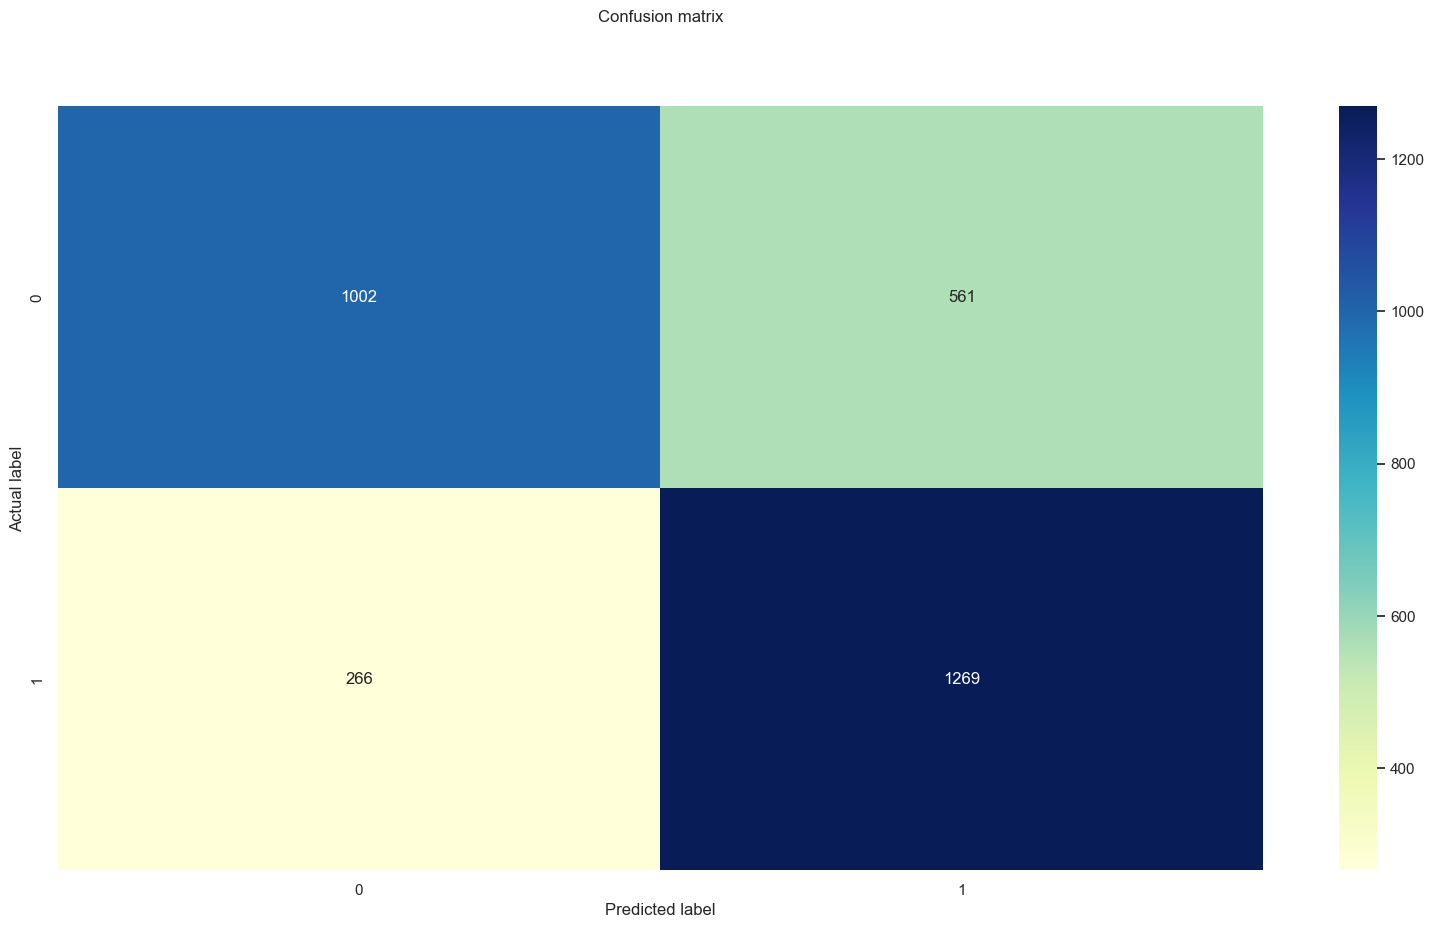

In [51]:
plot_conf_matrix(ytest, prediction_test, class_names)

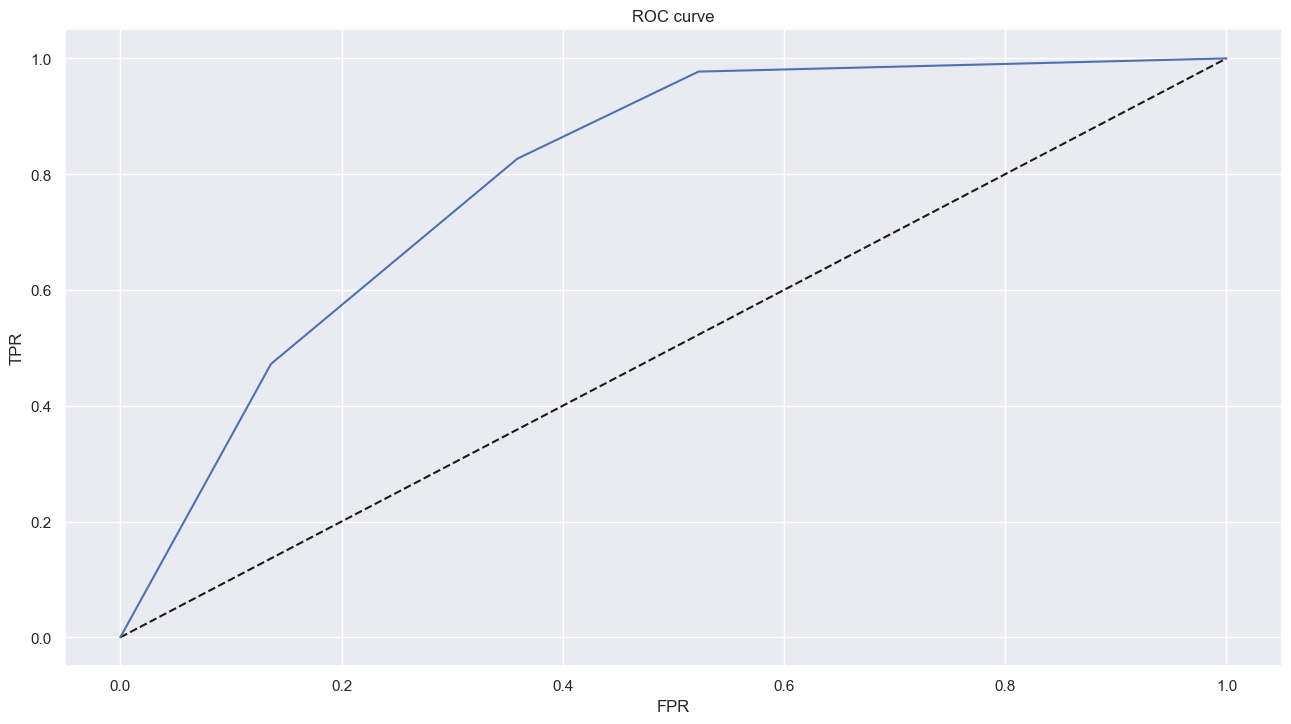

In [52]:
plot_roc(clf_knn,xtest,ytest)

In [53]:
#### 2-  Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression().fit(xtrain, ytrain) 
pred_test_lg = clf_lg.predict(xtest)

In [55]:
classification_report_func(clf_lg)

=========================== Model Evaluation ===========================
Classifier : LogisticRegression()

 Model Accuracy:
 0.7585539057456423

Confusion matrix:
 [[1127  436]
 [ 312 1223]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      1563
           1       0.74      0.80      0.77      1535

    accuracy                           0.76      3098
   macro avg       0.76      0.76      0.76      3098
weighted avg       0.76      0.76      0.76      3098



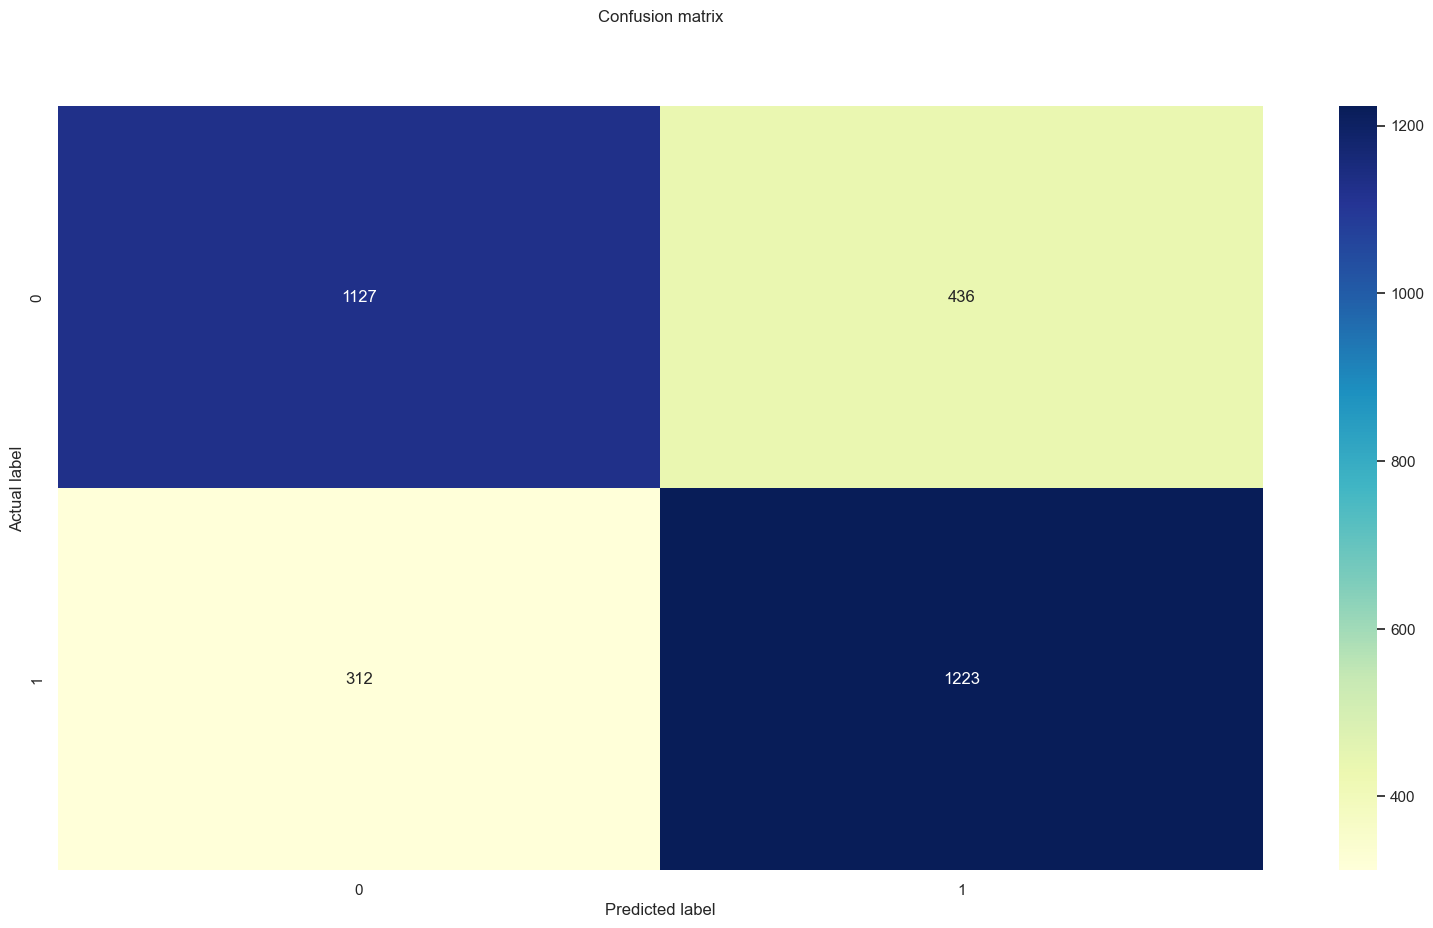

In [56]:
plot_conf_matrix(ytest, pred_test_lg, class_names)

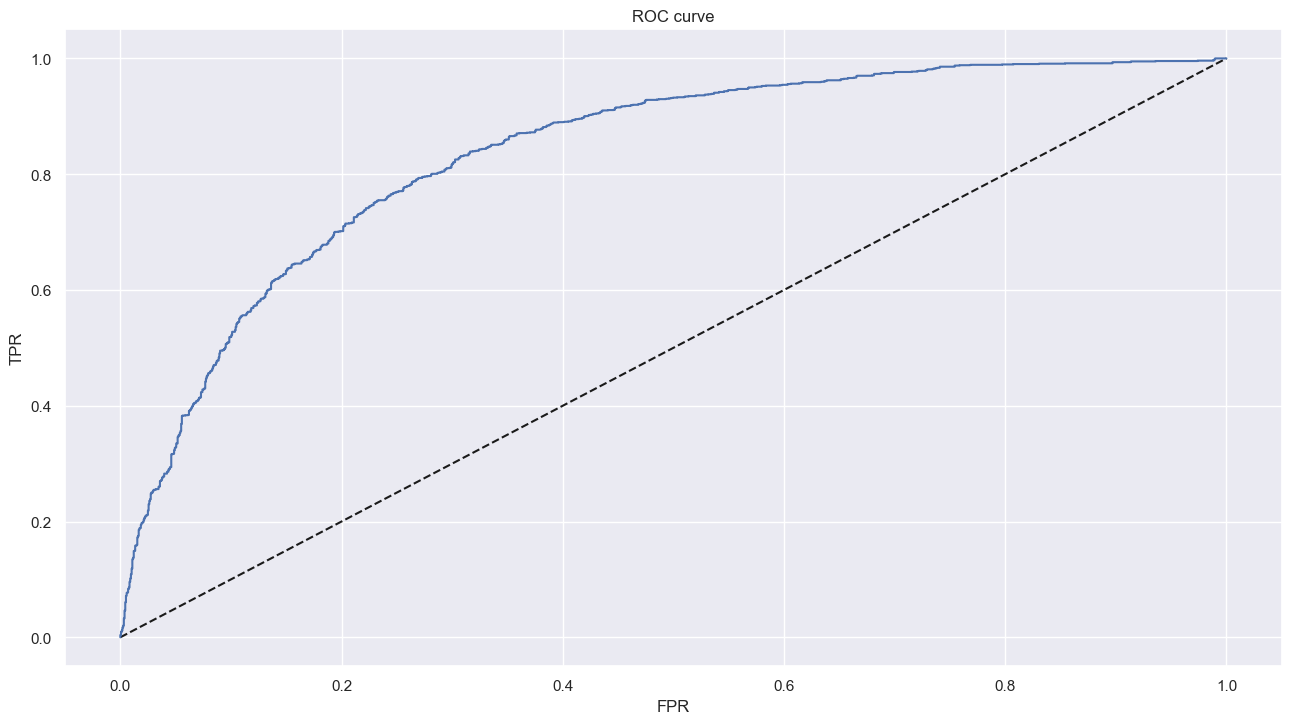

In [57]:
plot_roc(clf_lg,xtest,ytest)

#### 3- DecisionTree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [59]:
clf_dt=DecisionTreeClassifier(criterion="entropy", max_depth=7)
clf_dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

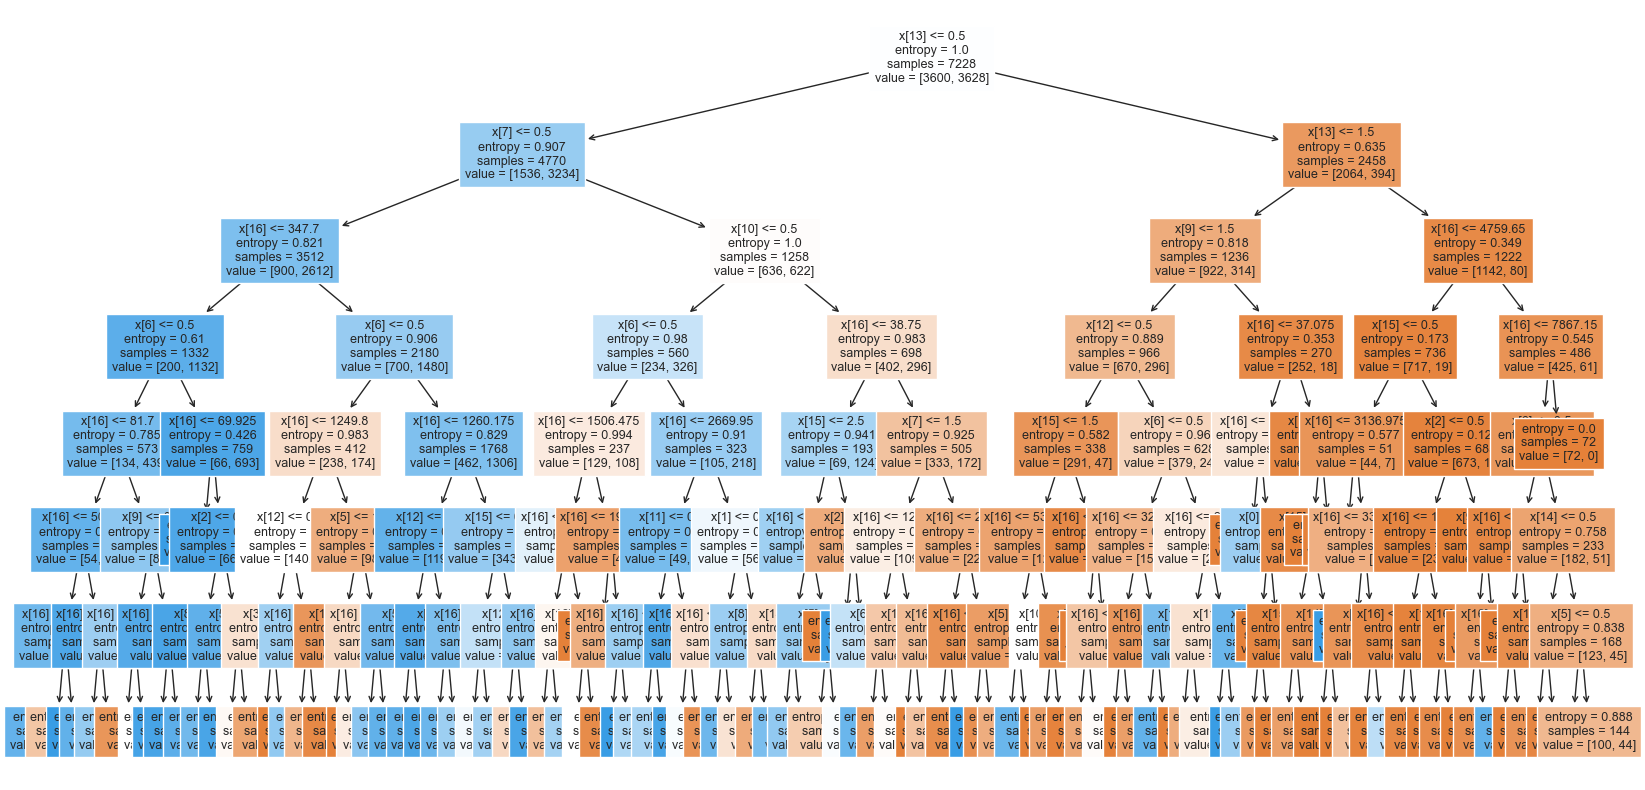

In [60]:
plt.figure(figsize=(20,10))
plot_tree(clf_dt,fontsize=9,filled=True)
plt.show()

In [61]:
pred_test_dt=clf_dt.predict(xtest)

In [62]:
classification_report_func(clf_dt)

=========================== Model Evaluation ===========================
Classifier : DecisionTreeClassifier(criterion='entropy', max_depth=7)

 Model Accuracy:
 0.7617817947062621

Confusion matrix:
 [[1148  415]
 [ 323 1212]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.76      1563
           1       0.74      0.79      0.77      1535

    accuracy                           0.76      3098
   macro avg       0.76      0.76      0.76      3098
weighted avg       0.76      0.76      0.76      3098



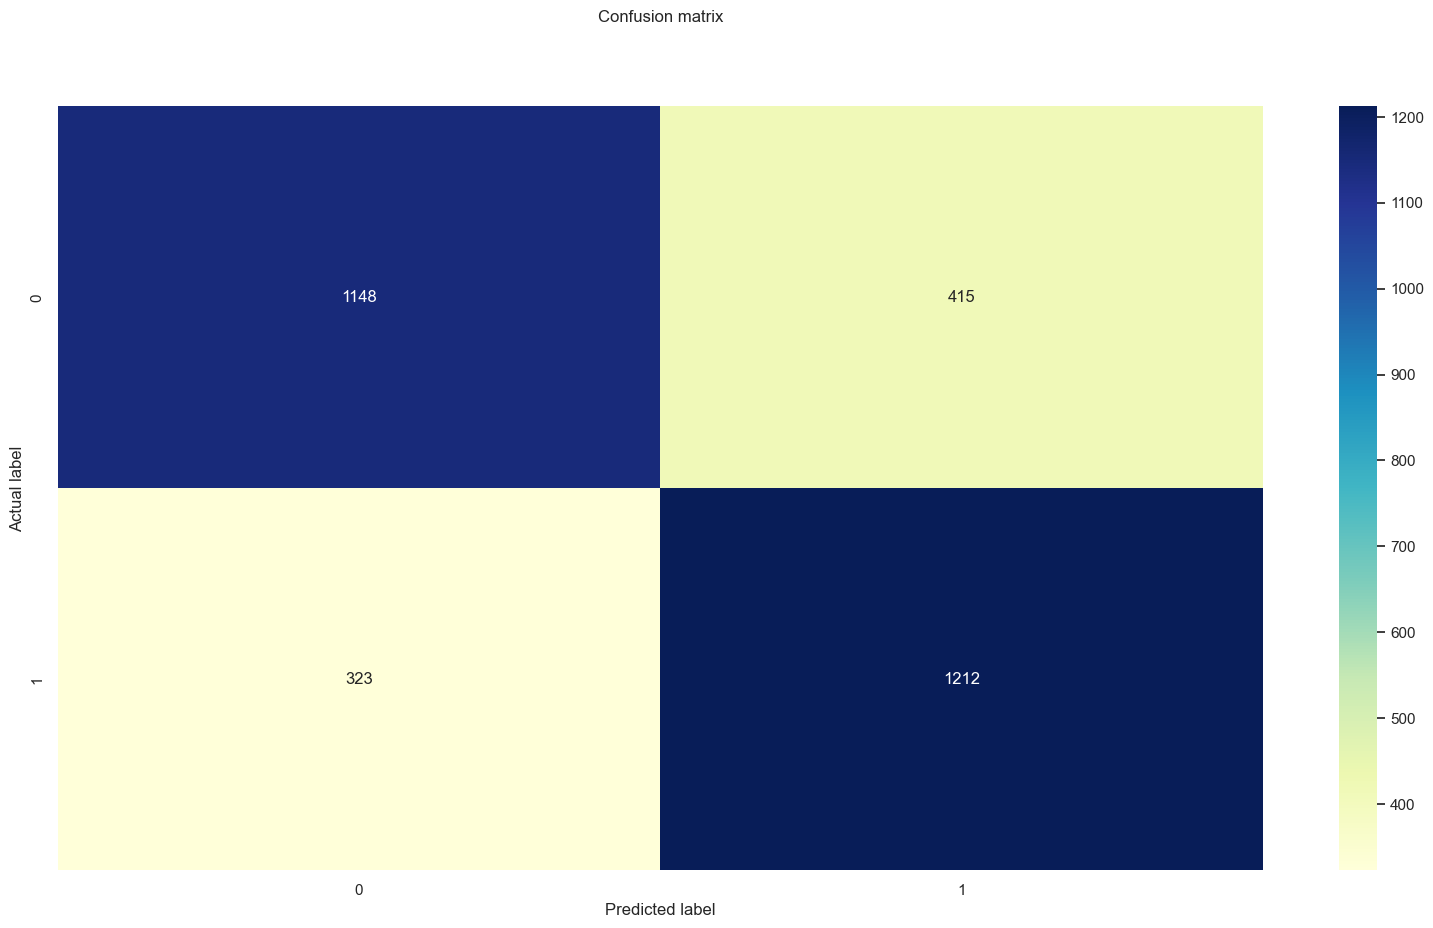

In [63]:
plot_conf_matrix(ytest, pred_test_dt, class_names)

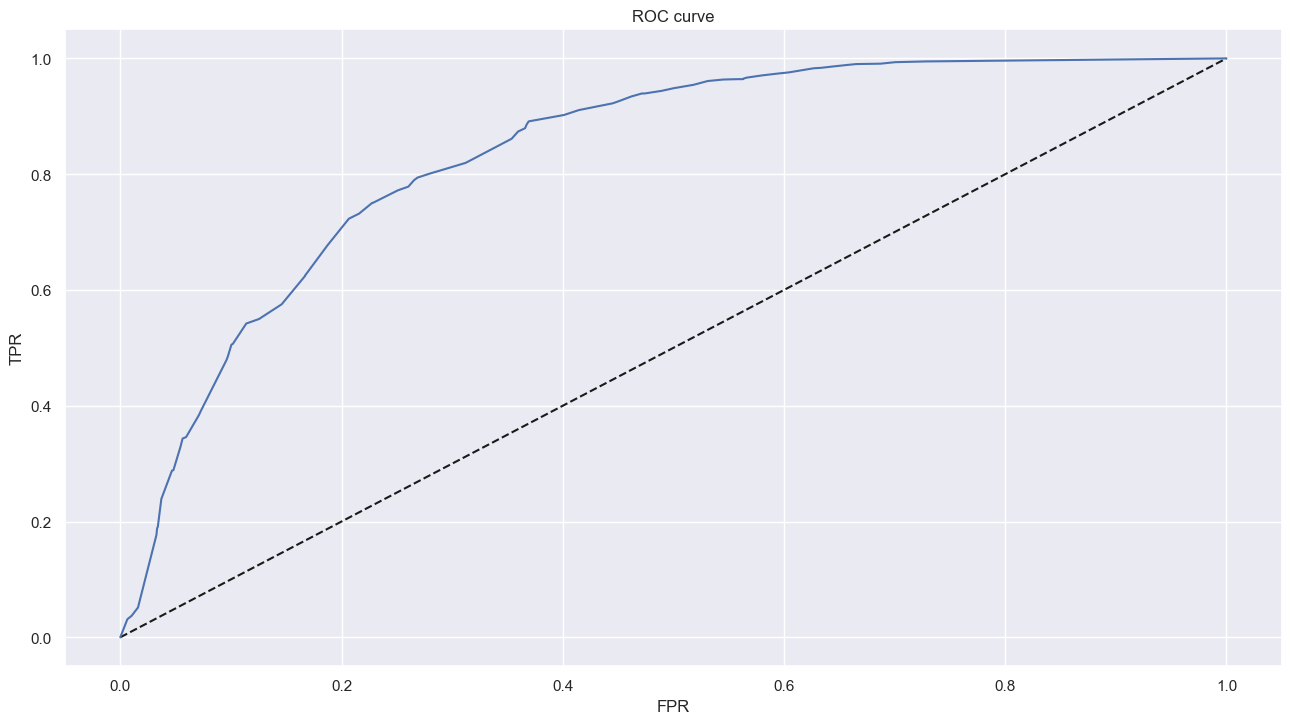

In [64]:
plot_roc(clf_dt,xtest,ytest)

#### 4- Support Vector Machine

In [65]:
from sklearn import svm

#svm Classifier creation
clf_svm = svm.SVC(kernel='rbf',probability=True) # Linear Kernel

#Train the model
clf_svm.fit(xtrain, ytrain)

#Response prediction for test dataset
y_pred_svm = clf_svm.predict(xtest)

In [66]:
classification_report_func(clf_svm)

=========================== Model Evaluation ===========================
Classifier : SVC(probability=True)

 Model Accuracy:
 0.6020012911555842

Confusion matrix:
 [[1101  462]
 [ 771  764]]

Classification report:
               precision    recall  f1-score   support

           0       0.59      0.70      0.64      1563
           1       0.62      0.50      0.55      1535

    accuracy                           0.60      3098
   macro avg       0.61      0.60      0.60      3098
weighted avg       0.61      0.60      0.60      3098



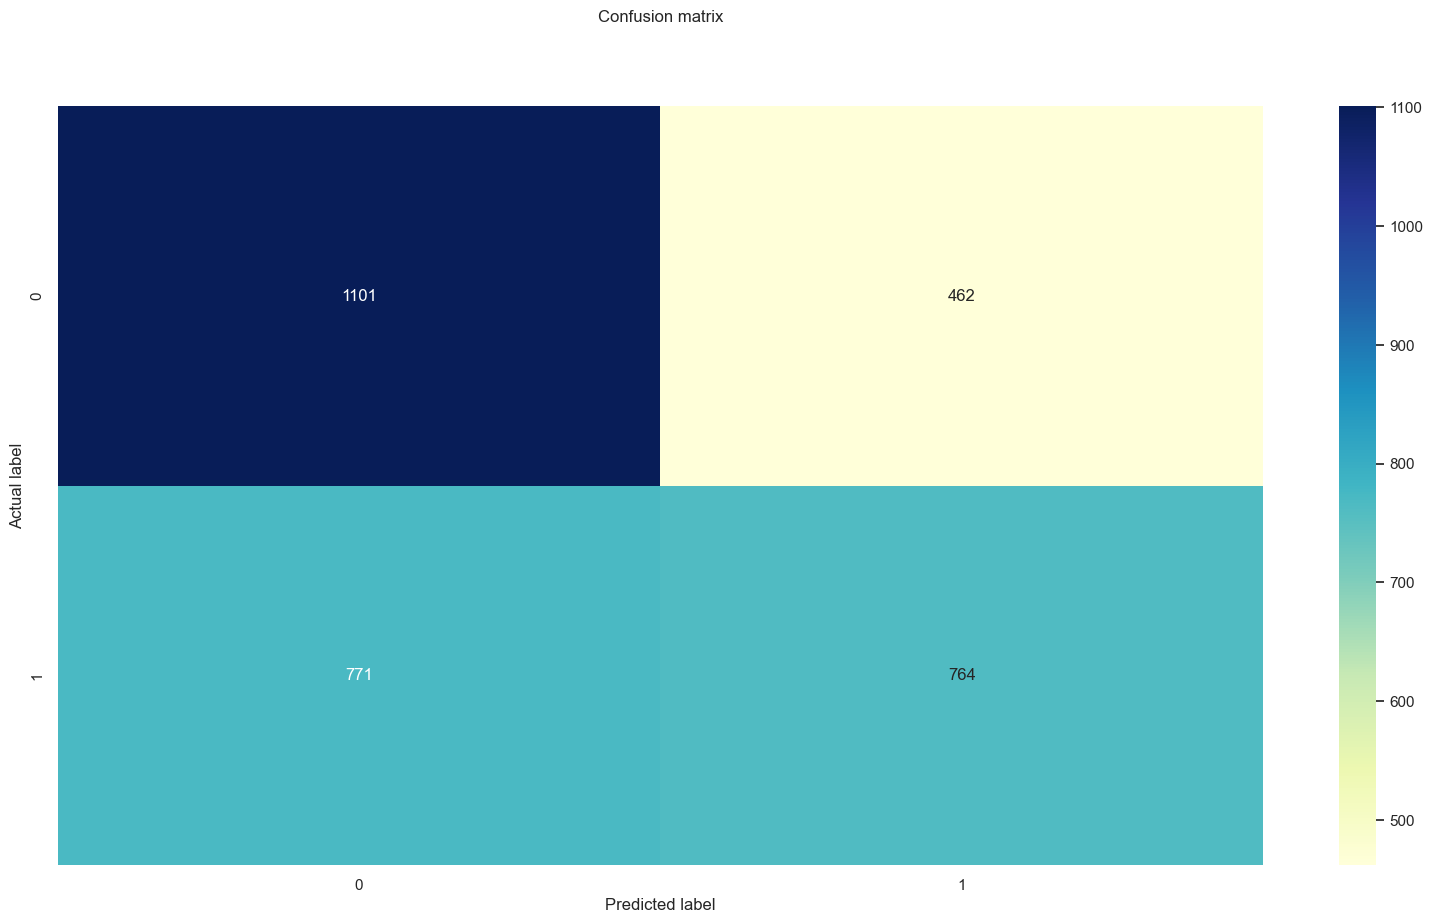

In [67]:
plot_conf_matrix(ytest, y_pred_svm, class_names)

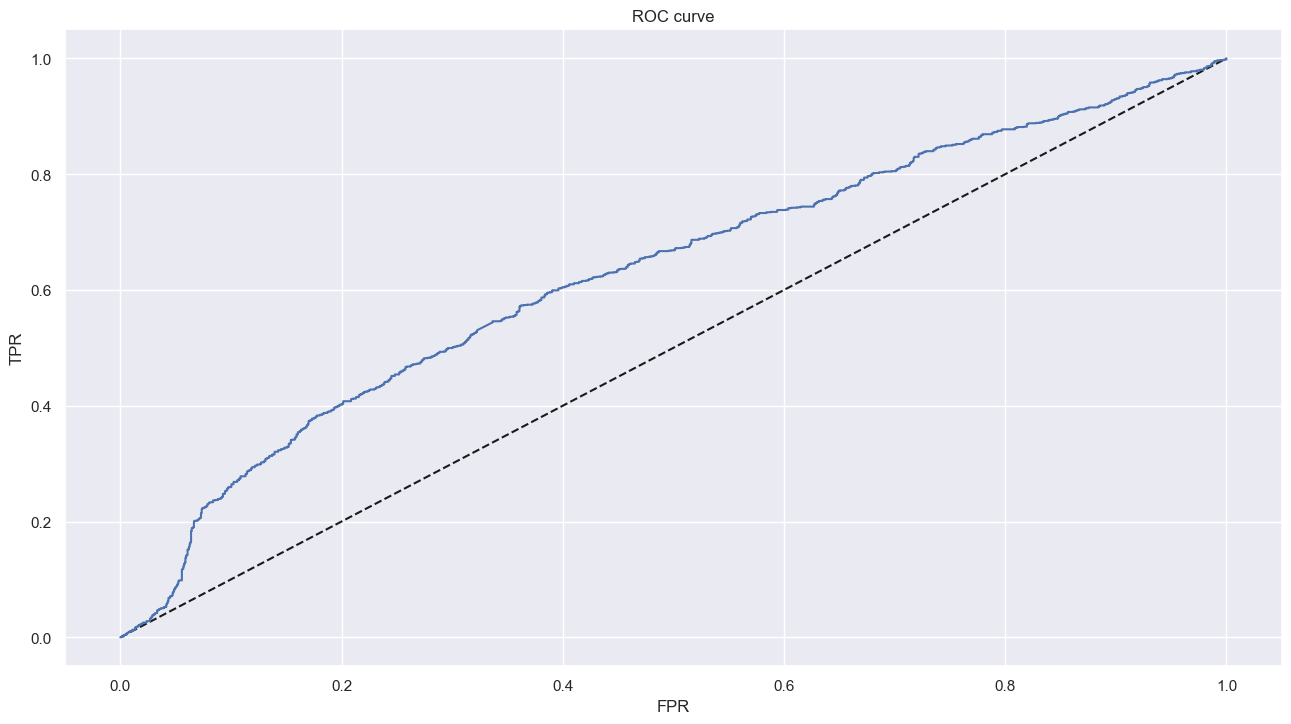

In [68]:
plot_roc(clf_svm,xtest,ytest)

#### 5- Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
clf_nb= GaussianNB().fit(xtrain, ytrain) 
pred_test_nb = clf_nb.predict(xtest)

In [71]:
classification_report_func(clf_nb)

=========================== Model Evaluation ===========================
Classifier : GaussianNB()

 Model Accuracy:
 0.7359586830213041

Confusion matrix:
 [[ 972  591]
 [ 227 1308]]

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.62      0.70      1563
           1       0.69      0.85      0.76      1535

    accuracy                           0.74      3098
   macro avg       0.75      0.74      0.73      3098
weighted avg       0.75      0.74      0.73      3098



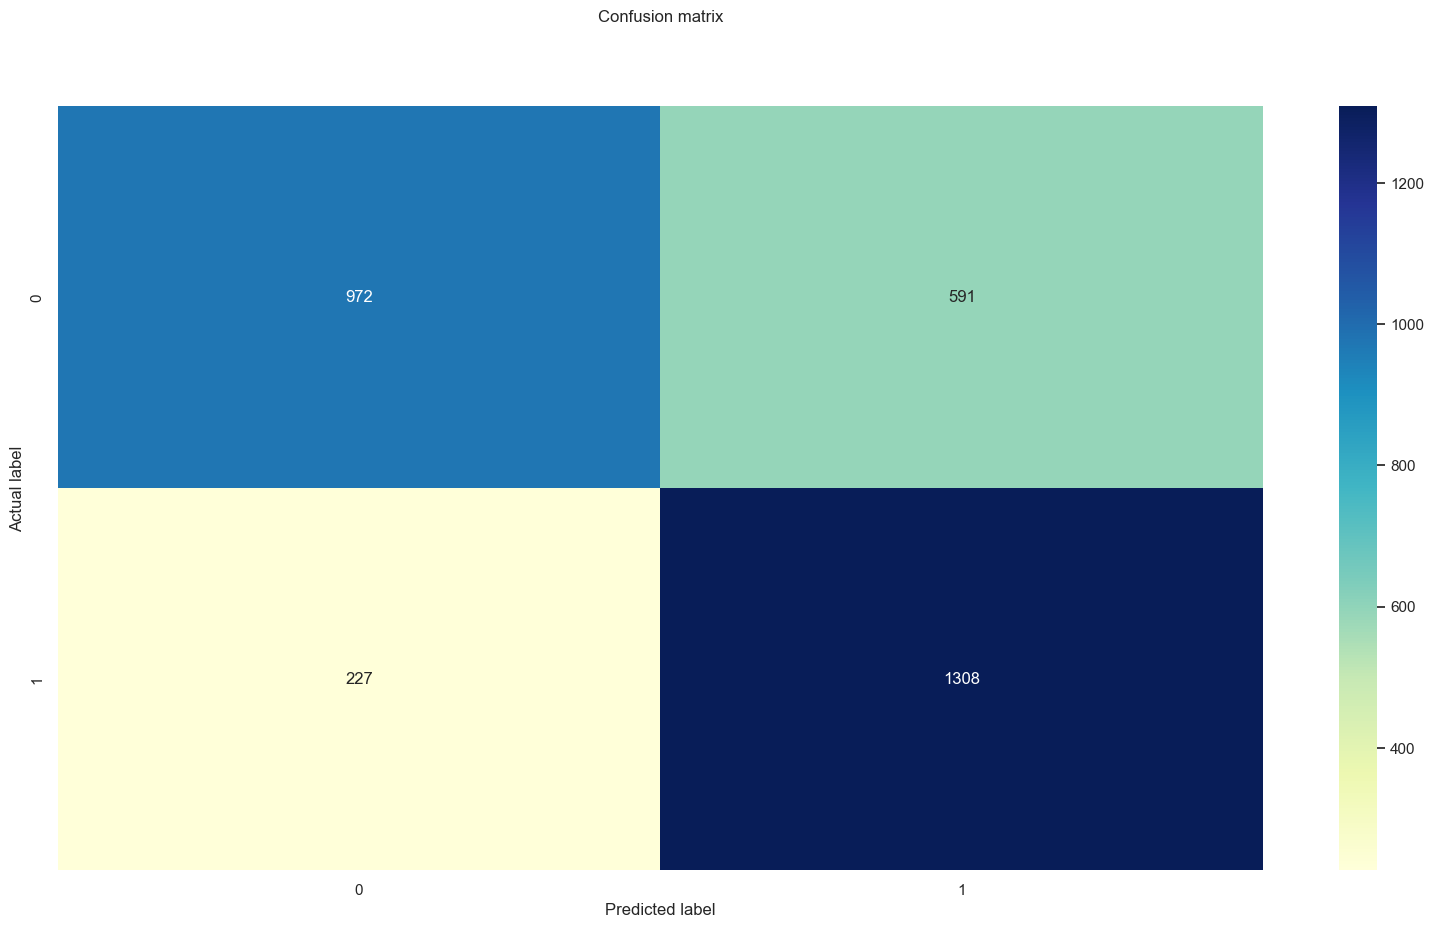

In [72]:
plot_conf_matrix(ytest, pred_test_nb, class_names)

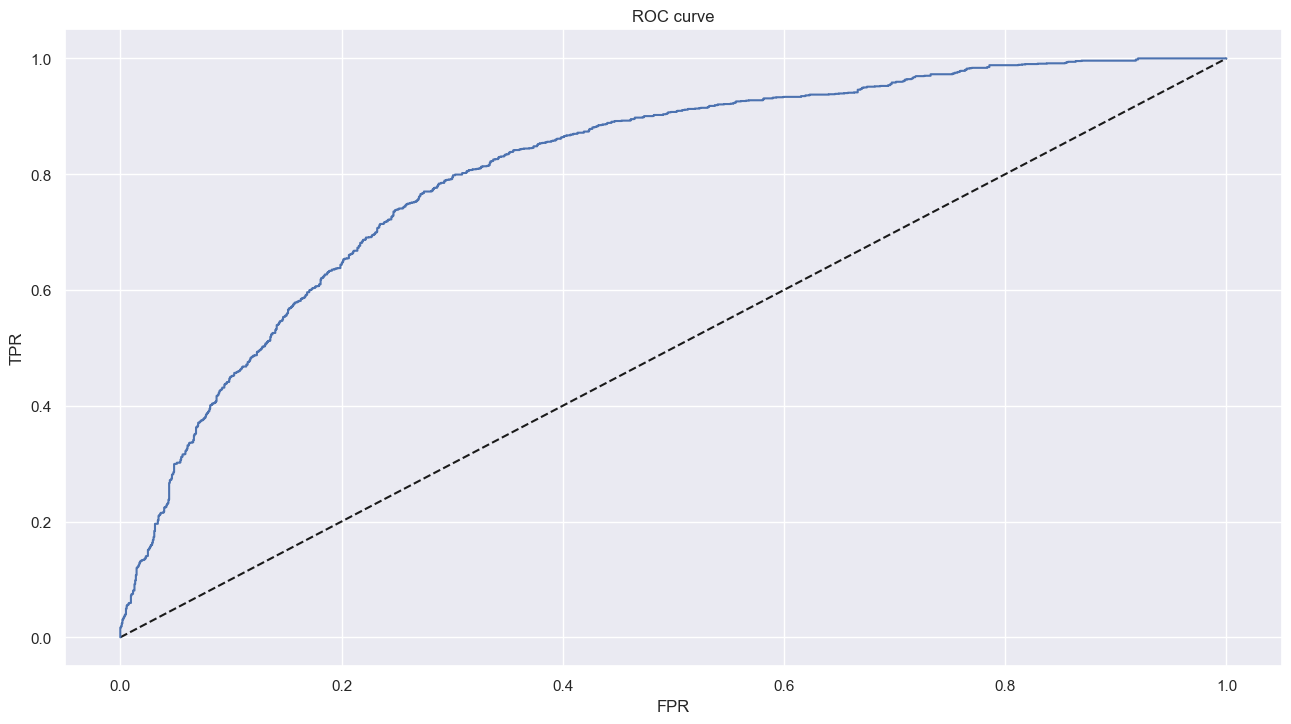

In [73]:
plot_roc(clf_nb,xtest,ytest)

#### 6- Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

#Gaussian Classifier creation
clf_rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(xtrain,ytrain)

pred_test_rf=clf_rf.predict(xtest)

In [75]:
classification_report_func(clf_rf)

=========================== Model Evaluation ===========================
Classifier : RandomForestClassifier()

 Model Accuracy:
 0.8776630083925113

Confusion matrix:
 [[1258  305]
 [  74 1461]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.87      1563
           1       0.83      0.95      0.89      1535

    accuracy                           0.88      3098
   macro avg       0.89      0.88      0.88      3098
weighted avg       0.89      0.88      0.88      3098



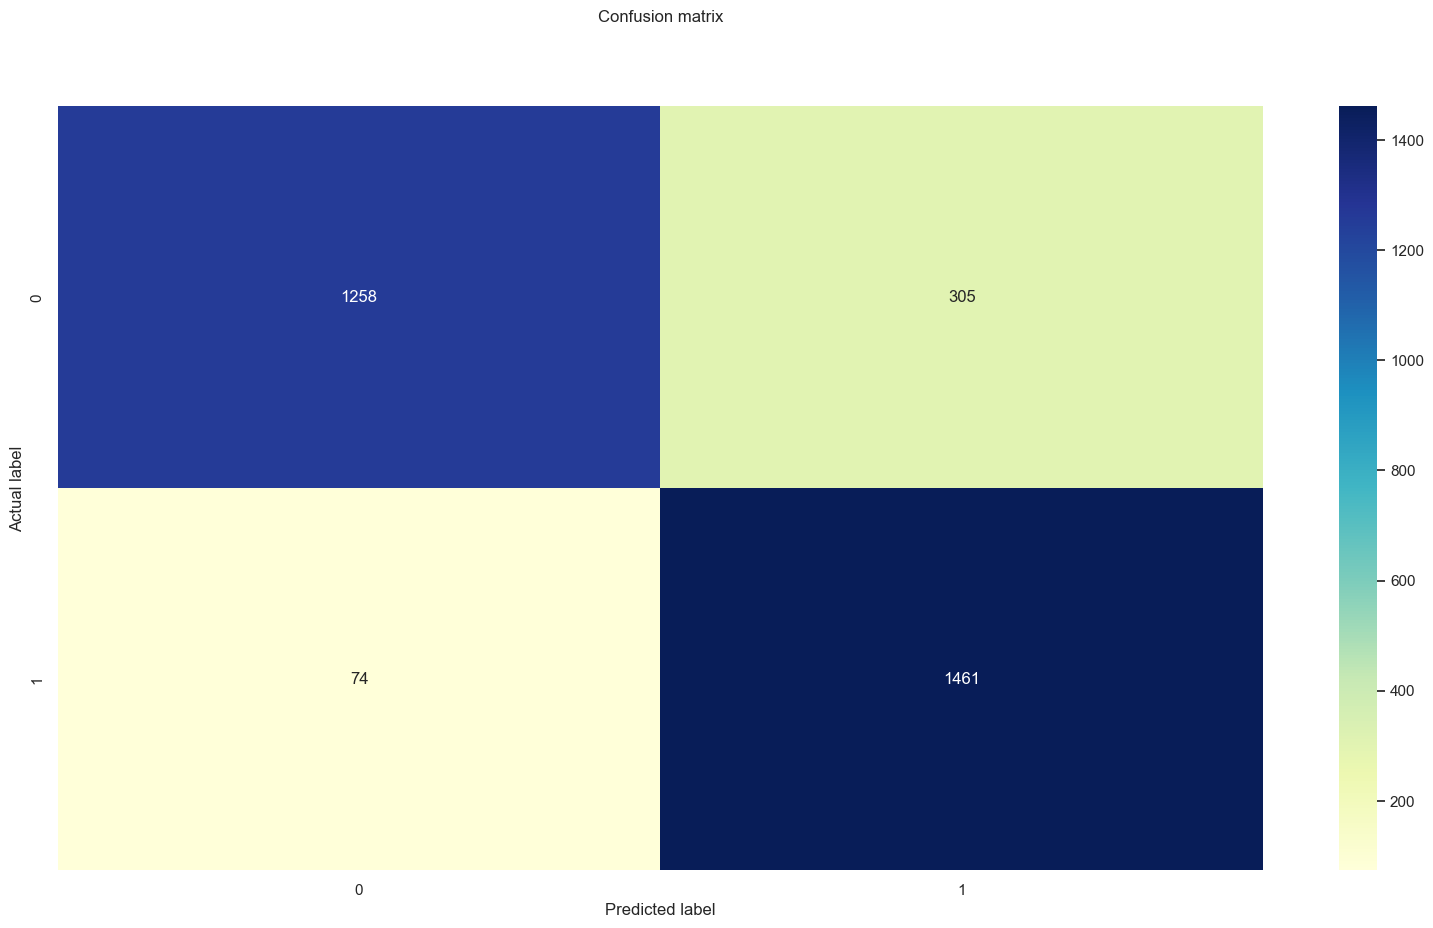

In [76]:
plot_conf_matrix(ytest, pred_test_rf, class_names)

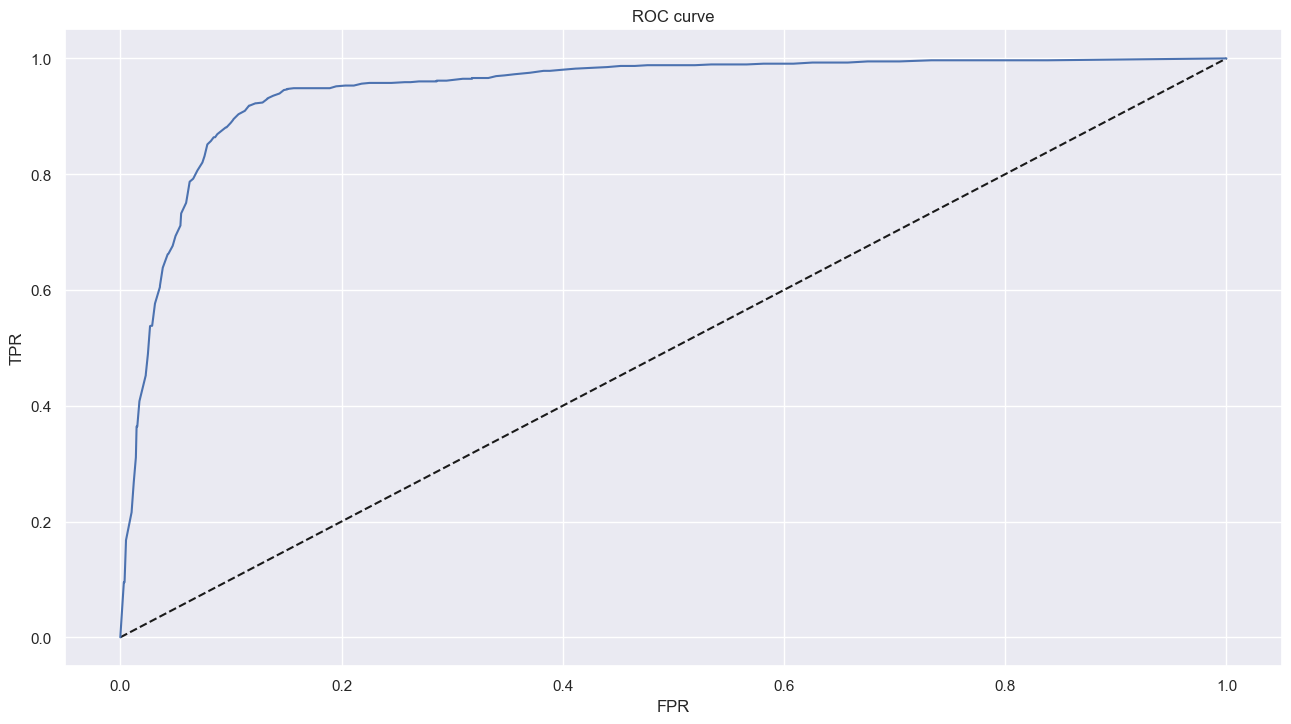

In [77]:
plot_roc(clf_rf,xtest,ytest)

**Analysis**

Εφαρμόσαμε 6 διαφορετικά μοντέλα εποπτευόμενης μηχανικής μάθησης με ταξινόμηση στα δεδομένα “Bank Customer Churn” για να δούμε ποιο μοντέλο αποδίδει καλύτερα στην πρόβλεψη της συμπεριφοράς των πελατών, εάν θα αποχωρήσει ή όχι. Για την αξιολόγηση της απόδοσης κάθε μοντέλου χρησιμοποιήθηκαν διαφορετικοί πίνακες αξιολόγησης (evaluation matrix), που είναι classification report, confusion matrix, and ROC curve. Από τις μετρήσεις αυτές παρατηρούμε ότι ο ταξινομητής Random Forest αποδίδει καλύτερα σε σχέση με τα υπόλοιπα 6 μοντέλα μηχανικής μάθησης με ακρίβεια 95%. Οι πελάτες που δεν έχουν ταξινομηθεί είναι 155 από 3186.

### Feature Importance 

In [78]:
feature_imp = clf_rf.feature_importances_
features = list(xtrain)
feature_list = sorted(zip(features, feature_imp),reverse=True)
feat_imp_df = pd.DataFrame(feature_list,columns=['features','feature_importance']).sort_values(by='feature_importance',
                                                                                               ascending=False)

In [79]:
feat_imp_df.style.background_gradient(cmap='Greens')

,features,feature_importance
1,TotalCharges,0.331113
16,Contract,0.137285
7,PaymentMethod,0.071504
2,TechSupport,0.055801
10,OnlineSecurity,0.053206
13,InternetService,0.037144
3,StreamingTV,0.035107
0,gender,0.034708
4,StreamingMovies,0.034148
11,OnlineBackup,0.033815


[Text(0.5, 1.0, 'Top 5 Important Features by Random Forest')]

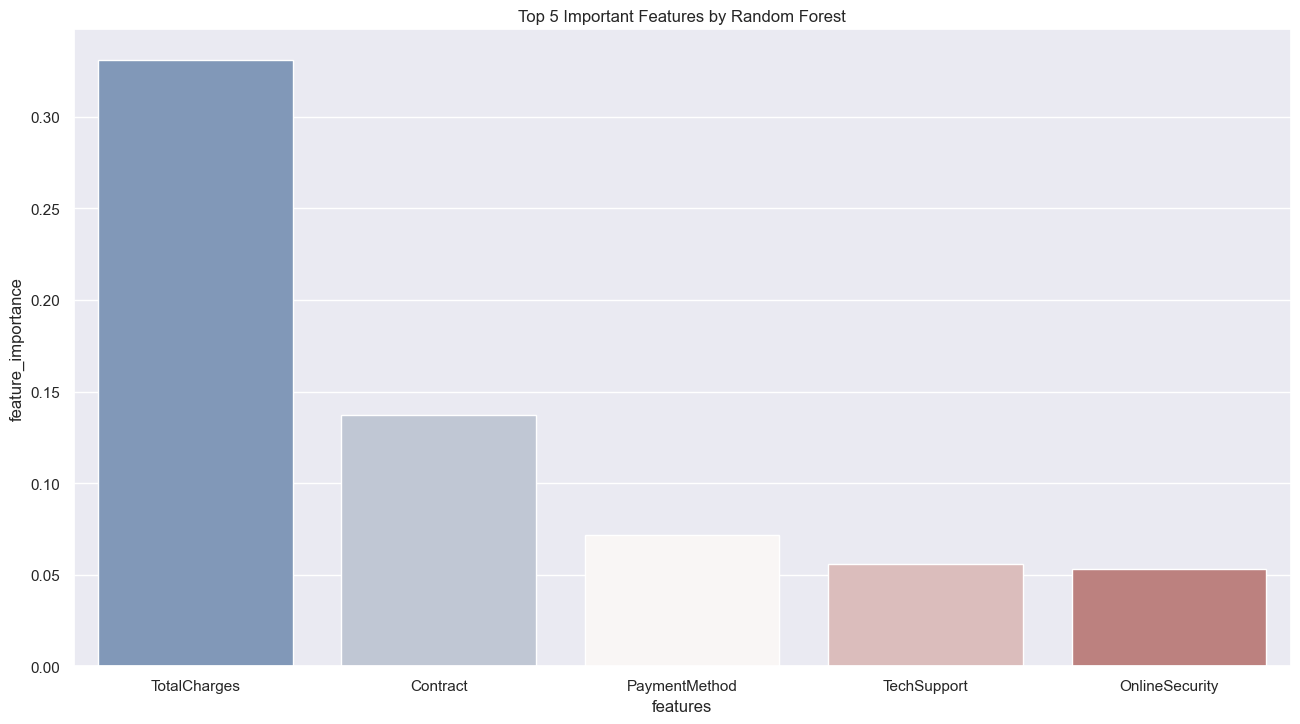

In [80]:
sns.barplot(x='features',y='feature_importance',data = feat_imp_df[:5], palette = 'vlag').set(title='Top 5 Important Features by Random Forest')

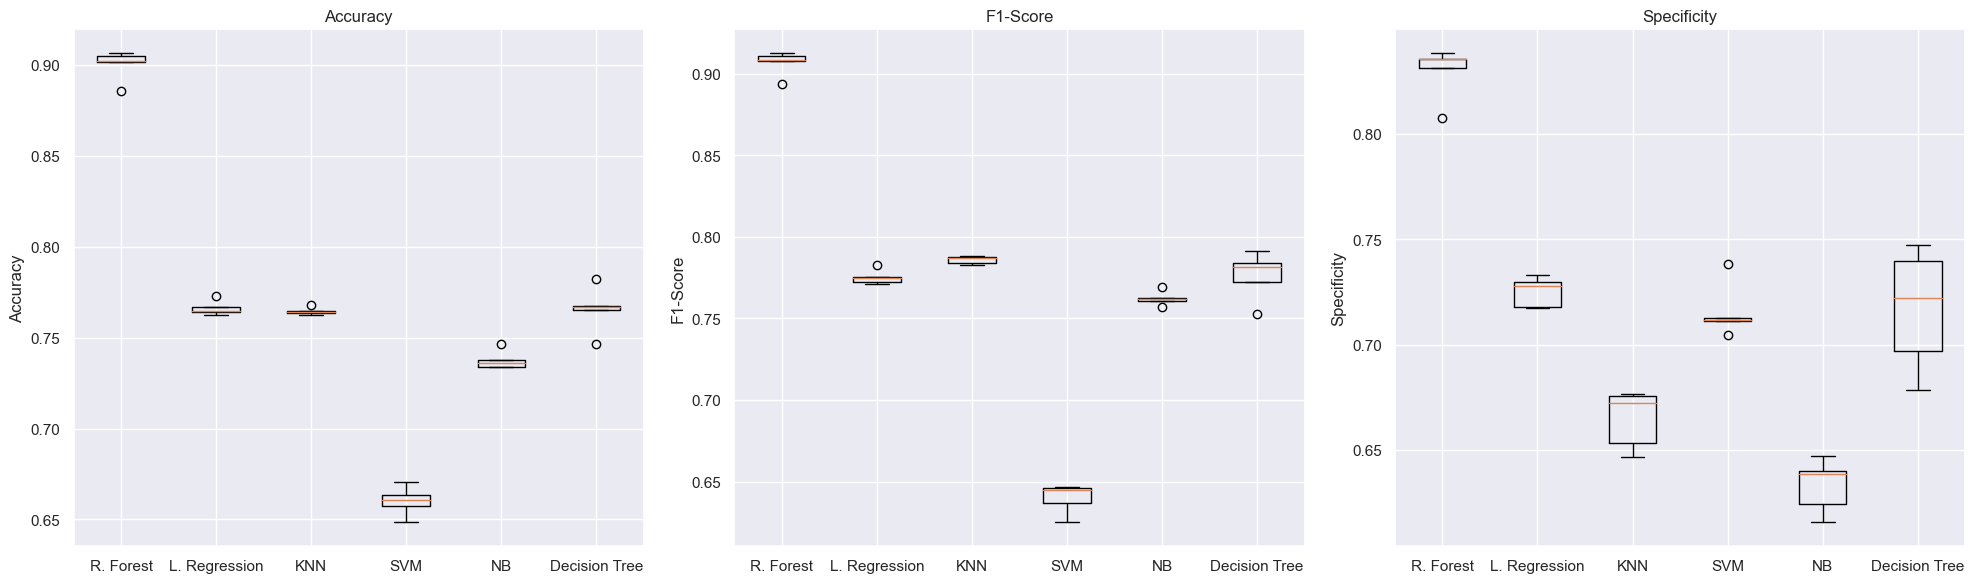

In [82]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Listing classifiers and assign their names
classifiers = [
    (RandomForestClassifier(n_estimators=100), 'R. Forest'),
    (LogisticRegression(), 'L. Regression'),
    (KNeighborsClassifier(n_neighbors=3), 'KNN'),
    (svm.SVC(kernel='rbf', probability=True), 'SVM'),
    (GaussianNB(), 'NB'),
    (DecisionTreeClassifier(criterion='gini', max_depth=7), 'Decision Tree'),
]

# Creating lists to store the accuracy, F1-score, and specificity values for each classifier
accuracy_values = []
f1_values = []
specificity_values = []

# Iteration through classifiers
for clf, clf_name in classifiers:
    # Initialize StratifiedKFold for cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lists to store accuracy, F1-score, and specificity values for each fold
    accuracy_fold_values = []
    f1_fold_values = []
    specificity_fold_values = []

    # Iteration through the folds
    for train_idx, test_idx in cv.split(selected_df.drop('Churn', axis=1), selected_df['Churn']):
        X_train, X_test = selected_df.drop('Churn', axis=1).iloc[train_idx], selected_df.drop('Churn', axis=1).iloc[test_idx]
        y_train, y_test = selected_df['Churn'].iloc[train_idx], selected_df['Churn'].iloc[test_idx]

        # Fit the model
        clf.fit(X_train, y_train)

        # Get predicted labels
        y_pred = clf.predict(X_test)

        # Calculation of the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        # Calculation of the accuracy, F1-score, and specificity
        accuracy_fold = accuracy_score(y_test, y_pred)
        f1_fold = f1_score(y_test, y_pred)
        specificity_fold = tn / (tn + fp)

        # Append values to fold lists
        accuracy_fold_values.append(accuracy_fold)
        f1_fold_values.append(f1_fold)
        specificity_fold_values.append(specificity_fold)

    # Append mean values for each metric
    accuracy_values.append(accuracy_fold_values)
    f1_values.append(f1_fold_values)
    specificity_values.append(specificity_fold_values)

# Convert lists to NumPy arrays
accuracy_values = np.array(accuracy_values)
f1_values = np.array(f1_values)
specificity_values = np.array(specificity_values)

# Box plots creation for the accuracy, F1-score, and specificity
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.boxplot(accuracy_values.T, labels=[clf_name for _, clf_name in classifiers])
plt.title('Accuracy')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.boxplot(f1_values.T, labels=[clf_name for _, clf_name in classifiers])
plt.title('F1-Score')
plt.ylabel('F1-Score')

plt.subplot(1, 3, 3)
plt.boxplot(specificity_values.T, labels=[clf_name for _, clf_name in classifiers])
plt.title('Specificity')
plt.ylabel('Specificity')

plt.tight_layout()
plt.show()
